# Setup
- 참고문서
  - https://wikidocs.net/book/14473
  - https://wikidocs.net/book/14314
  - https://github.com/teddylee777/langchain-kr

## Install

In [1]:
!pip install -U langchain langchain-community langchain-experimental langchain-core langchain-openai langsmith langchainhub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 639.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.8/289.8 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.1/374.1 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/

## OpenAI Key 등록
- [OpenAI Key 발급방법](https://platform.openai.com/api-keys)
- [OpenAI 요금](https://openai.com/api/pricing/)

In [2]:
import os

os.environ['OPENAI_API_KEY'] = '생성한 키 입력'

## 구글 드라이브 연결(데이터 로드를 위해서)

In [3]:
# 구글 드라이브 연결(데이터 로드를 위해서)

try:
    from google.colab import drive

    drive.mount('/content/data')
    DATA_PATH = "/content/data/MyDrive/ai_lecture/3. Large Language Models/data/"
except:

    DATA_PATH = "./data/"

Mounted at /content/data


# Memory

## 대화 버퍼 메모리 - ConversationBufferMemory
- 이 메모리는 메시지를 저장한 다음 변수에 메시지를 추출할 수 있게 해줍니다.

In [4]:
from langchain.memory import ConversationBufferMemory

`save_context(inputs, outputs)` 메서드를 사용하여 대화 기록을 저장할 수 있습니다.
- 이 메서드는 `inputs`와 `outputs` 두 개의 인자를 받습니다.
- `inputs`는 사용자의 입력을, `outputs`는 AI의 출력을 저장합니다.
- 이 메서드를 사용하면 대화 기록이 `history` 키에 저장됩니다.
- 이후 `load_memory_variables` 메서드를 사용하여 저장된 대화 기록을 확인할 수 있습니다.

In [5]:
memory = ConversationBufferMemory()

# inputs: dictionary(key: "human" or "ai", value: 질문)
# outputs: dictionary(key: "ai" or "human", value: 답변)
memory.save_context(
    inputs={
        "human": "안녕하세요, 비대면으로 은행 계좌를 개설하고 싶습니다. 어떻게 시작해야 하나요?"
    },
    outputs={
        "ai": "안녕하세요! 계좌 개설을 원하신다니 기쁩니다. 먼저, 본인 인증을 위해 신분증을 준비해 주시겠어요?"
    },
)

- memory 의 `load_memory_variables({})` 함수는 메시지 히스토리를 반환합니다.

In [6]:
# 'history' 키에 저장된 대화 기록을 확인합니다.
memory.load_memory_variables({})

{'history': 'Human: 안녕하세요, 비대면으로 은행 계좌를 개설하고 싶습니다. 어떻게 시작해야 하나요?\nAI: 안녕하세요! 계좌 개설을 원하신다니 기쁩니다. 먼저, 본인 인증을 위해 신분증을 준비해 주시겠어요?'}

In [7]:
memory.save_context(
    inputs={"human": "네, 신분증을 준비했습니다. 이제 무엇을 해야 하나요?"},
    outputs={
        "ai": "감사합니다. 신분증 앞뒤를 명확하게 촬영하여 업로드해 주세요. 이후 본인 인증 절차를 진행하겠습니다."
    },
)

memory.save_context(
    inputs={"human": "사진을 업로드했습니다. 본인 인증은 어떻게 진행되나요?"},
    outputs={
        "ai": "업로드해 주신 사진을 확인했습니다. 이제 휴대폰을 통한 본인 인증을 진행해 주세요. 문자로 발송된 인증번호를 입력해 주시면 됩니다."
    },
)

memory.save_context(
    inputs={"human": "인증번호를 입력했습니다. 계좌 개설은 이제 어떻게 하나요?"},
    outputs={
        "ai": "본인 인증이 완료되었습니다. 이제 원하시는 계좌 종류를 선택하고 필요한 정보를 입력해 주세요. 예금 종류, 통화 종류 등을 선택할 수 있습니다."
    },
)

In [8]:
# history에 저장된 대화 기록을 확인합니다.
print(memory.load_memory_variables({})["history"])

Human: 안녕하세요, 비대면으로 은행 계좌를 개설하고 싶습니다. 어떻게 시작해야 하나요?
AI: 안녕하세요! 계좌 개설을 원하신다니 기쁩니다. 먼저, 본인 인증을 위해 신분증을 준비해 주시겠어요?
Human: 네, 신분증을 준비했습니다. 이제 무엇을 해야 하나요?
AI: 감사합니다. 신분증 앞뒤를 명확하게 촬영하여 업로드해 주세요. 이후 본인 인증 절차를 진행하겠습니다.
Human: 사진을 업로드했습니다. 본인 인증은 어떻게 진행되나요?
AI: 업로드해 주신 사진을 확인했습니다. 이제 휴대폰을 통한 본인 인증을 진행해 주세요. 문자로 발송된 인증번호를 입력해 주시면 됩니다.
Human: 인증번호를 입력했습니다. 계좌 개설은 이제 어떻게 하나요?
AI: 본인 인증이 완료되었습니다. 이제 원하시는 계좌 종류를 선택하고 필요한 정보를 입력해 주세요. 예금 종류, 통화 종류 등을 선택할 수 있습니다.


- `return_messages=True` 로 설정하면 `HumanMessage` 와 `AIMessage` 객체를 반환합니다.

In [9]:
memory = ConversationBufferMemory(return_messages=True)

memory.save_context(
    inputs={
        "human": "안녕하세요, 비대면으로 은행 계좌를 개설하고 싶습니다. 어떻게 시작해야 하나요?"
    },
    outputs={
        "ai": "안녕하세요! 계좌 개설을 원하신다니 기쁩니다. 먼저, 본인 인증을 위해 신분증을 준비해 주시겠어요?"
    },
)

memory.save_context(
    inputs={"human": "네, 신분증을 준비했습니다. 이제 무엇을 해야 하나요?"},
    outputs={
        "ai": "감사합니다. 신분증 앞뒤를 명확하게 촬영하여 업로드해 주세요. 이후 본인 인증 절차를 진행하겠습니다."
    },
)

memory.save_context(
    inputs={"human": "사진을 업로드했습니다. 본인 인증은 어떻게 진행되나요?"},
    outputs={
        "ai": "업로드해 주신 사진을 확인했습니다. 이제 휴대폰을 통한 본인 인증을 진행해 주세요. 문자로 발송된 인증번호를 입력해 주시면 됩니다."
    },
)

In [10]:
# history에 저장된 대화 기록을 확인합니다.
memory.load_memory_variables({})["history"]

[HumanMessage(content='안녕하세요, 비대면으로 은행 계좌를 개설하고 싶습니다. 어떻게 시작해야 하나요?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='안녕하세요! 계좌 개설을 원하신다니 기쁩니다. 먼저, 본인 인증을 위해 신분증을 준비해 주시겠어요?', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='네, 신분증을 준비했습니다. 이제 무엇을 해야 하나요?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='감사합니다. 신분증 앞뒤를 명확하게 촬영하여 업로드해 주세요. 이후 본인 인증 절차를 진행하겠습니다.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='사진을 업로드했습니다. 본인 인증은 어떻게 진행되나요?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='업로드해 주신 사진을 확인했습니다. 이제 휴대폰을 통한 본인 인증을 진행해 주세요. 문자로 발송된 인증번호를 입력해 주시면 됩니다.', additional_kwargs={}, response_metadata={})]

### with Chain

In [11]:
from langchain_openai import ChatOpenAI
from langchain.chains import ConversationChain

# LLM 모델을 생성합니다.
llm = ChatOpenAI(temperature=0)

# ConversationChain을 생성합니다.
conversation = ConversationChain(
    # ConversationBufferMemory를 사용합니다.
    llm=llm,
    memory=ConversationBufferMemory(),
)

<ipython-input-11-5c2a489011ff>:8: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use RunnableWithMessageHistory: https://python.langchain.com/v0.2/api_reference/core/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html instead.
  conversation = ConversationChain(


- `ConversationChain`을 사용하여 대화를 진행합니다.

In [12]:
# 대화를 시작합니다.
response = conversation.predict(
    input="안녕하세요, 비대면으로 은행 계좌를 개설하고 싶습니다. 어떻게 시작해야 하나요?"
)
print(response)

안녕하세요! 은행 계좌를 개설하려면 먼저 해당 은행의 공식 웹사이트에 접속하셔야 합니다. 거기서 온라인 계좌 개설 절차를 따라 가입 신청을 할 수 있습니다. 개인 정보와 신분증 사본 등을 제출해야 할 수도 있습니다. 그러면 은행 측에서 심사를 거친 후에 계좌가 개설될 것입니다. 혹시 어떤 은행을 이용하실 건가요?


- 이전의 대화 기록을 기억하고 있는지 확인합니다.

In [13]:
# 이전 대화내용을 불렛포인트로 정리해 달라는 요청을 보냅니다.
response = conversation.predict(
    input="이전 답변을 불렛포인트 형식으로 정리하여 알려주세요."
)
print(response)

은행 계좌를 개설하려면 해당 은행의 공식 웹사이트에 접속하여 온라인 가입 신청을 하고 개인 정보와 신분증 사본을 제출해야 합니다. 은행 측에서 심사 후 계좌가 개설됩니다.


## 대화 버퍼 윈도우 메모리 - ConversationBufferWindowMemory
- `ConversationBufferWindowMemory` 는 시간이 지남에 따라 대화의 상호작용 목록을 유지합니다.
- 이때, `ConversationBufferWindowMemory` 는 모든 대화내용을 활용하는 것이 아닌 `최근 K개 의 상호작용`만 사용합니다.
- 이는 버퍼가 너무 커지지 않도록 가장 최근 상호작용의 슬라이딩 창을 유지하는 데 유용할 수 있습니다.

In [14]:
from langchain.memory import ConversationBufferWindowMemory

memory = ConversationBufferWindowMemory(k=2, return_messages=True)

In [15]:
memory.save_context(
    inputs={
        "human": "안녕하세요, 비대면으로 은행 계좌를 개설하고 싶습니다. 어떻게 시작해야 하나요?"
    },
    outputs={
        "ai": "안녕하세요! 계좌 개설을 원하신다니 기쁩니다. 먼저, 본인 인증을 위해 신분증을 준비해 주시겠어요?"
    },
)
memory.save_context(
    inputs={"human": "네, 신분증을 준비했습니다. 이제 무엇을 해야 하나요?"},
    outputs={
        "ai": "감사합니다. 신분증 앞뒤를 명확하게 촬영하여 업로드해 주세요. 이후 본인 인증 절차를 진행하겠습니다."
    },
)
memory.save_context(
    inputs={"human": "사진을 업로드했습니다. 본인 인증은 어떻게 진행되나요?"},
    outputs={
        "ai": "업로드해 주신 사진을 확인했습니다. 이제 휴대폰을 통한 본인 인증을 진행해 주세요. 문자로 발송된 인증번호를 입력해 주시면 됩니다."
    },
)
memory.save_context(
    inputs={"human": "인증번호를 입력했습니다. 계좌 개설은 이제 어떻게 하나요?"},
    outputs={
        "ai": "본인 인증이 완료되었습니다. 이제 원하시는 계좌 종류를 선택하고 필요한 정보를 입력해 주세요. 예금 종류, 통화 종류 등을 선택할 수 있습니다."
    },
)

- 대화기록을 확인해 보면 `최근 2개 의 메시지`만 반환하는 것을 확인할 수 있습니다.

In [16]:
# 대화 기록을 확인합니다.
memory.load_memory_variables({})["history"]

[HumanMessage(content='사진을 업로드했습니다. 본인 인증은 어떻게 진행되나요?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='업로드해 주신 사진을 확인했습니다. 이제 휴대폰을 통한 본인 인증을 진행해 주세요. 문자로 발송된 인증번호를 입력해 주시면 됩니다.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='인증번호를 입력했습니다. 계좌 개설은 이제 어떻게 하나요?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='본인 인증이 완료되었습니다. 이제 원하시는 계좌 종류를 선택하고 필요한 정보를 입력해 주세요. 예금 종류, 통화 종류 등을 선택할 수 있습니다.', additional_kwargs={}, response_metadata={})]

## 대화 토큰 버퍼 메모리 - ConversationTokenBufferMemory
- `ConversationTokenBufferMemory` 는 최근 대화의 히스토리를 버퍼를 메모리에 보관하고, 대화의 개수가 아닌 `토큰 길이` 를 사용하여 대화내용을 플러시(flush)할 시기를 결정합니다.
- `max_token_limit`: 대화 내용을 저장할 최대 토큰의 길이를 설정합니다.

In [17]:
from langchain.memory import ConversationTokenBufferMemory
from langchain_openai import ChatOpenAI


# LLM 모델 생성
llm = ChatOpenAI()

# 메모리 설정
memory = ConversationTokenBufferMemory(
    llm=llm, max_token_limit=150, return_messages=True  # 최대 토큰 길이를 150개로 제한
)

In [18]:
memory.save_context(
    inputs={
        "human": "안녕하세요, 저는 최근에 여러분 회사의 공작 기계를 구매했습니다. 설치 방법을 알려주실 수 있나요?"
    },
    outputs={
        "ai": "안녕하세요! 구매해 주셔서 감사합니다. 해당 기계 모델 번호를 알려주시겠어요?"
    },
)
memory.save_context(
    inputs={"human": "네, 모델 번호는 XG-200입니다."},
    outputs={
        "ai": "감사합니다. XG-200 모델의 설치 안내를 도와드리겠습니다. 먼저, 설치할 장소의 전원 공급 상태를 확인해주세요. 기계는 220V 전원이 필요합니다."
    },
)
memory.save_context(
    inputs={"human": "전원은 확인했습니다. 다음 단계는 무엇인가요?"},
    outputs={
        "ai": "좋습니다. 다음으로, 기계를 평평하고 안정된 바닥에 배치해 주세요. 이후, 제공된 사용자 매뉴얼에 따라 케이블 연결을 진행해 주시기 바랍니다."
    },
)
memory.save_context(
    inputs={"human": "연결은 어떻게 하나요?"},
    outputs={
        "ai": "매뉴얼의 5페이지를 참조해 주세요. 케이블 연결에 관한 상세한 지침이 있습니다. 이 과정에서 어려움이 있으시면 추가적으로 도와드리겠습니다."
    },
)

In [19]:
# 대화내용을 확인합니다.
memory.load_memory_variables({})["history"]

[HumanMessage(content='연결은 어떻게 하나요?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='매뉴얼의 5페이지를 참조해 주세요. 케이블 연결에 관한 상세한 지침이 있습니다. 이 과정에서 어려움이 있으시면 추가적으로 도와드리겠습니다.', additional_kwargs={}, response_metadata={})]

## 대화 엔티티 메모리 - ConversationEntityMemory
- 엔티티 메모리는 대화에서 특정 엔티티에 대한 주어진 사실을 기억합니다.
- 엔티티 메모리는 `엔티티에 대한 정보를 추출하고(LLM 사용)` 시간이 지남에 따라 해당 `엔티티에 대한 지식을 축적(LLM 사용)`합니다.

In [20]:
from langchain_openai import ChatOpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationEntityMemory
from langchain.memory.prompt import ENTITY_MEMORY_CONVERSATION_TEMPLATE

- Entity 메모리를 효과적으로 사용하기 위하여, 제공되는 프롬프트를 사용합니다.

In [21]:
# Entity Memory를 사용하는 프롬프트 내용을 출력합니다.
print(ENTITY_MEMORY_CONVERSATION_TEMPLATE.template)

You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, allowing you to engage in discussions and provide explanations and de

- 입력한 대화를 바탕으로 `ConversationEntityMemory` 는 주요 Entity 정보를 별도록 저장합니다.

In [22]:
# LLM 을 생성합니다.
llm = ChatOpenAI(temperature=0)

# ConversationChain 을 생성합니다.
conversation = ConversationChain(
    llm=llm,
    prompt=ENTITY_MEMORY_CONVERSATION_TEMPLATE,
    memory=ConversationEntityMemory(llm=llm),
)

In [23]:
conversation.predict(
    input="테디와 셜리는 한 회사에서 일하는 동료입니다."
    "테디는 개발자이고 셜리는 디자이너입니다. "
    "그들은최근 회사에서 일하는 것을 그만두고 자신들의 회사를 차릴 계획을 세우고 있습니다."
)

'테디와 셜리가 자신들의 회사를 차릴 계획을 세우고 있다는 것은 흥미로운 소식입니다. 테디가 개발자이고 셜리가 디자이너라면, 그들이 함께 일하면서 각자의 강점을 발휘할 수 있을 것입니다. 자신들의 비전과 목표를 공유하고 협력하여 성공을 이루길 바랍니다. 새로운 회사 창업이 흥미로운 여정이 될 것입니다.'

- Entity는 `memory.entity_store.store` 에서 확인할 수 있습니다.

In [24]:
# entity memory 를 출력합니다.
conversation.memory.entity_store.store

{'테디': '테디는 개발자이고, 셜리와 함께 자신들의 회사를 차릴 계획을 세우고 있습니다.',
 '셜리': '셜리는 한 회사에서 디자이너로 일하고 있으며, 테디와 함께 자신들의 회사를 차릴 계획을 세우고 있습니다.'}

## 대화 지식그래프 메모리 - ConversationKGMemory
- 지식 그래프의 힘을 활용하여 정보를 저장하고 불러옵니다.
- 이를 통해 모델이 서로 다른 개체 간의 관계를 이해하는 데 도움을 주고, 복잡한 연결망과 역사적 맥락을 기반으로 대응하는 능력을 향상시킵니다.

### [지식 그래프(Knowledge Graph)란?](https://heehehe-ds.tistory.com/191)
- 지식그래프(Knowledge Graph)는 말 그대로 "지식"을 "그래프"의 형태로 표현한 것이다.

아래 그림에서의 예시들("다빈치는 모나리자를 그렸다", "모나리자는 루브르 박물관에 위치해 있다" 등)과 같이
각 데이터 개체(entity) 사이의 관계(relation)를 그래프의 선(edge)으로 나타낸 것이며,
데이터 간 어떻게 유기적으로 연결되어 있는지 파악할 수 있는 형태로 구성되어 있다.

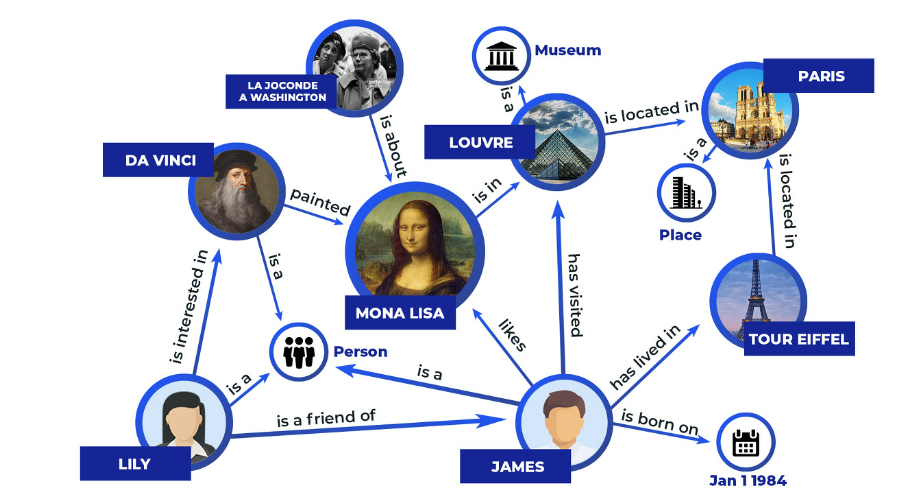

#### [지식 그래프 구성요소](https://www.samsungsds.com/kr/insights/techtoolkit_2021_knowledge_graph.html)
강력한 시각적 요소와 구조적 인사이트를 결합하여 복잡한 데이터 세트를 이해하고 분석하는 데 도움을 줍니다.

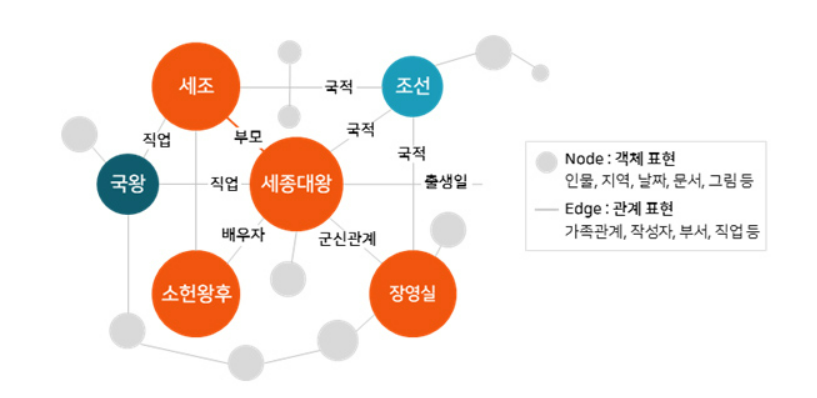

- `노드`
  - 지식 그래프의 첫 번째 핵심 구성 요소는 노드입니다. 노드는 개체나 항목을 나타내며, 이는 사람, 장소, 개념, 이벤트 등이 될 수 있습니다.
  - 각 노드는 고유한 식별자를 가지고 있어 지식 그래프에서 고유하게 식별할 수 있습니다.
  - 또한, 노드는 각각의 속성(예: 이름, 위치, 타입 등)을 가질 수 있습니다.
- `엣지`
  - 노드 간의 관계를 나타내는 두 번째 구성 요소는 엣지입니다.
  - 엣지는 노드와 노드 사이의 연결을 표현하며, 이 연결은 방향성을 가질 수 있습니다.
  - 예를 들어, "서울은 한국의 수도다"라는 관계를 나타내는 경우 '서울'과 '한국'은 노드가 되고, '수도다'는 엣지가 됩니다.
- `속성`
  - 속성은 노드가 가질 수 있는 정보의 세부 사항을 나타냅니다.
  - 예를 들어, 사람이라는 노드에 대한 속성으로는 이름, 나이, 직업 등이 있을 수 있습니다.
  - 엣지에도 속성을 부여할 수 있는데, 이 경우 해당 관계의 특성을 보다 자세하게 설명하는 데 사용됩니다
- `메타데이터`
  - 메타데이터는 지식 그래프의 구성 요소를 보다 정확하게 표현하고 설명하기 위한 추가 정보입니다.
  - 이는 노드와 엣지의 타입, 출처, 생성 날짜 등이 될 수 있습니다

### 예제

In [25]:
from langchain_openai import ChatOpenAI
from langchain.memory import ConversationKGMemory

In [26]:
llm = ChatOpenAI(temperature=0)

memory = ConversationKGMemory(llm=llm, return_messages=True)
memory.save_context(
    {"input": "이쪽은 Pangyo 에 거주중인 김셜리씨 입니다."},
    {"output": "김셜리씨는 누구시죠?"},
)
memory.save_context(
    {"input": "김셜리씨는 우리 회사의 신입 디자이너입니다."},
    {"output": "만나서 반갑습니다."},
)

In [27]:
memory.load_memory_variables({"input": "김셜리씨는 누구입니까?"})

{'history': [SystemMessage(content='On Pangyo: Pangyo has resident 김셜리씨.', additional_kwargs={}, response_metadata={}),
  SystemMessage(content='On 김셜리씨: 김셜리씨 is a 신입 디자이너. 김셜리씨 is in 우리 회사.', additional_kwargs={}, response_metadata={})]}

#### with Chain
- `ConversationChain` 에 `ConversationKGMemory` 를 메모리로 지정하여 대화를 나눈 후 memory 를 확인해 보도록 하겠습니다.

In [28]:
from langchain.prompts.prompt import PromptTemplate
from langchain.chains import ConversationChain

llm = ChatOpenAI(temperature=0)

In [29]:
template = """The following is a friendly conversation between a human and an AI.
The AI is talkative and provides lots of specific details from its context.
If the AI does not know the answer to a question, it truthfully says it does not know.
The AI ONLY uses information contained in the "Relevant Information" section and does not hallucinate.

Relevant Information:

{history}

Conversation:
Human: {input}
AI:"""
prompt = PromptTemplate(
    input_variables=["history", "input"], template=template)

In [30]:
conversation_with_kg = ConversationChain(
    llm=llm, prompt=prompt, memory=ConversationKGMemory(llm=llm)
)

- 첫 번째 대화를 시작합니다. 간단한 인물에 대한 정보를 제공해 보겠습니다.

In [31]:
conversation_with_kg.predict(
    input="My name is Teddy. Shirley is a coworker of mine, and she's a new designer at our company."
)

"Hello Teddy! It's nice to meet you. Shirley must be excited to be starting a new job as a designer at your company. I hope she's settling in well and getting to know everyone. If you need any tips on how to make her feel welcome or help her adjust to the new role, feel free to ask!"

- Shirley 라는 사람에 대한 질문을 진행합니다.

In [32]:
# Shirley 에 대한 질문
conversation_with_kg.memory.load_memory_variables({"input": "who is Shirley?"})

{'history': 'On Shirley: Shirley is a coworker. Shirley is a new designer. Shirley is at our company.'}

## 대화 요약 메모리 - ConversationSummaryMemory
- `ConversationSummaryMemory` 를 사용하는 방법을 살펴 보겠습니다.
- 이 유형의 메모리는 시간 경과에 따른 `대화의 요약` 을 생성합니다. 이는 시간 경과에 따른 대화의 정보를 압축하는 데 유용할 수 있습니다.
- 대화 요약 메모리는 대화가 진행되는 동안 대화를 요약하고 `현재 요약을 메모리에 저장` 합니다.
- 그런 다음 이 메모리를 사용하여 지금까지의 대화 요약을 프롬프트/체인에 삽입할 수 있습니다.
- 이 메모리는 과거 메시지 기록을 프롬프트에 그대로 보관하면 토큰을 너무 많이 차지할 수 있는 긴 대화에 가장 유용합니다.

In [33]:
from langchain.memory import ConversationSummaryMemory
from langchain_openai import ChatOpenAI

memory = ConversationSummaryMemory(
    llm=ChatOpenAI(temperature=0), return_messages=True)

In [34]:
memory.save_context(
    inputs={"human": "유럽 여행 패키지의 가격은 얼마인가요?"},
    outputs={
        "ai": "유럽 14박 15일 패키지의 기본 가격은 3,500유로입니다. 이 가격에는 항공료, 호텔 숙박비, 지정된 관광지 입장료가 포함되어 있습니다. 추가 비용은 선택하신 옵션 투어나 개인 경비에 따라 달라집니다."
    },
)
memory.save_context(
    inputs={"human": "여행 중에 방문할 주요 관광지는 어디인가요?"},
    outputs={
        "ai": "이 여행에서는 파리의 에펠탑, 로마의 콜로세움, 베를린의 브란덴부르크 문, 취리히의 라이네폴 등 유럽의 유명한 관광지들을 방문합니다. 각 도시의 대표적인 명소들을 포괄적으로 경험하실 수 있습니다."
    },
)
memory.save_context(
    inputs={"human": "여행자 보험은 포함되어 있나요?"},
    outputs={
        "ai": "네, 모든 여행자에게 기본 여행자 보험을 제공합니다. 이 보험은 의료비 지원, 긴급 상황 발생 시 지원 등을 포함합니다. 추가적인 보험 보장을 원하시면 상향 조정이 가능합니다."
    },
)
memory.save_context(
    inputs={
        "human": "항공편 좌석을 비즈니스 클래스로 업그레이드할 수 있나요? 비용은 어떻게 되나요?"
    },
    outputs={
        "ai": "항공편 좌석을 비즈니스 클래스로 업그레이드하는 것이 가능합니다. 업그레이드 비용은 왕복 기준으로 약 1,200유로 추가됩니다. 비즈니스 클래스에서는 더 넓은 좌석, 우수한 기내식, 그리고 추가 수하물 허용량 등의 혜택을 제공합니다."
    },
)
memory.save_context(
    inputs={"human": "패키지에 포함된 호텔의 등급은 어떻게 되나요?"},
    outputs={
        "ai": "이 패키지에는 4성급 호텔 숙박이 포함되어 있습니다. 각 호텔은 편안함과 편의성을 제공하며, 중심지에 위치해 관광지와의 접근성이 좋습니다. 모든 호텔은 우수한 서비스와 편의 시설을 갖추고 있습니다."
    },
)
memory.save_context(
    inputs={"human": "식사 옵션에 대해 더 자세히 알려주실 수 있나요?"},
    outputs={
        "ai": "이 여행 패키지는 매일 아침 호텔에서 제공되는 조식을 포함하고 있습니다. 점심과 저녁 식사는 포함되어 있지 않아, 여행자가 자유롭게 현지의 다양한 음식을 경험할 수 있는 기회를 제공합니다. 또한, 각 도시별로 추천 식당 리스트를 제공하여 현지의 맛을 최대한 즐길 수 있도록 도와드립니다."
    },
)
memory.save_context(
    inputs={"human": "패키지 예약 시 예약금은 얼마인가요? 취소 정책은 어떻게 되나요?"},
    outputs={
        "ai": "패키지 예약 시 500유로의 예약금이 필요합니다. 취소 정책은 예약일로부터 30일 전까지는 전액 환불이 가능하며, 이후 취소 시에는 예약금이 환불되지 않습니다. 여행 시작일로부터 14일 전 취소 시 50%의 비용이 청구되며, 그 이후는 전액 비용이 청구됩니다."
    },
)

- 저장된 메모리의 history 를 확인합니다.
- 이전의 모든 대화를 압축적으로 요약한 내용을 확인할 수 있습니다.

In [35]:
# 저장된 메모리 확인
print(memory.load_memory_variables({})["history"])

[SystemMessage(content="The human asks about the price of a European travel package, and the AI provides details on the basic cost and what it includes. The human then inquires about main tourist attractions, traveler's insurance, upgrading flight seats to business class, hotel grade, and meal options. The AI answers each question thoroughly, offering information on reservation deposits, cancellation policies, and refund conditions.", additional_kwargs={}, response_metadata={})]


### ConversationSummaryBufferMemory
- `ConversationSummaryBufferMemory` 는 두 가지 아이디어를 결합한 것입니다.
- 최근 대화내용의 버퍼를 메모리에 유지하되, 이전 대화내용을 완전히 플러시(flush)하지 않고 요약으로 컴파일하여 두 가지를 모두 사용합니다.
- 대화내용을 플러시할 시기를 결정하기 위해 상호작용의 개수가 아닌 토큰 길이 를 사용합니다.

In [36]:
from langchain_openai import ChatOpenAI
from langchain.memory import ConversationSummaryBufferMemory

llm = ChatOpenAI()

memory = ConversationSummaryBufferMemory(
    llm=llm,
    max_token_limit=200,  # 요약의 기준이 되는 토큰 길이를 설정합니다.
    return_messages=True,
)

In [37]:
memory.save_context(
    inputs={"human": "유럽 여행 패키지의 가격은 얼마인가요?"},
    outputs={
        "ai": "유럽 14박 15일 패키지의 기본 가격은 3,500유로입니다. 이 가격에는 항공료, 호텔 숙박비, 지정된 관광지 입장료가 포함되어 있습니다. 추가 비용은 선택하신 옵션 투어나 개인 경비에 따라 달라집니다."
    },
)

- 아직은 대화내용을 요약하지 않습니다. 기준이 되는 200 토큰에 도달하지 않았기 때문입니다.

In [38]:
# 메모리에 저장된 대화내용 확인
memory.load_memory_variables({})["history"]

[HumanMessage(content='유럽 여행 패키지의 가격은 얼마인가요?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='유럽 14박 15일 패키지의 기본 가격은 3,500유로입니다. 이 가격에는 항공료, 호텔 숙박비, 지정된 관광지 입장료가 포함되어 있습니다. 추가 비용은 선택하신 옵션 투어나 개인 경비에 따라 달라집니다.', additional_kwargs={}, response_metadata={})]

In [39]:
memory.save_context(
    inputs={"human": "여행 중에 방문할 주요 관광지는 어디인가요?"},
    outputs={
        "ai": "이 여행에서는 파리의 에펠탑, 로마의 콜로세움, 베를린의 브란덴부르크 문, 취리히의 라이네폴 등 유럽의 유명한 관광지들을 방문합니다. 각 도시의 대표적인 명소들을 포괄적으로 경험하실 수 있습니다."
    },
)
memory.save_context(
    inputs={"human": "여행자 보험은 포함되어 있나요?"},
    outputs={
        "ai": "네, 모든 여행자에게 기본 여행자 보험을 제공합니다. 이 보험은 의료비 지원, 긴급 상황 발생 시 지원 등을 포함합니다. 추가적인 보험 보장을 원하시면 상향 조정이 가능합니다."
    },
)
memory.save_context(
    inputs={
        "human": "항공편 좌석을 비즈니스 클래스로 업그레이드할 수 있나요? 비용은 어떻게 되나요?"
    },
    outputs={
        "ai": "항공편 좌석을 비즈니스 클래스로 업그레이드하는 것이 가능합니다. 업그레이드 비용은 왕복 기준으로 약 1,200유로 추가됩니다. 비즈니스 클래스에서는 더 넓은 좌석, 우수한 기내식, 그리고 추가 수하물 허용량 등의 혜택을 제공합니다."
    },
)
memory.save_context(
    inputs={"human": "패키지에 포함된 호텔의 등급은 어떻게 되나요?"},
    outputs={
        "ai": "이 패키지에는 4성급 호텔 숙박이 포함되어 있습니다. 각 호텔은 편안함과 편의성을 제공하며, 중심지에 위치해 관광지와의 접근성이 좋습니다. 모든 호텔은 우수한 서비스와 편의 시설을 갖추고 있습니다."
    },
)

- 저장된 대화내용을 확인합니다. 가장 최근 1개의 대화에 대해서는 요약이 진행되지 않지만, 이전의 대화내용은 요약본으로 저장되어 있습니다.

In [40]:
# 메모리에 저장된 대화내용 확인
memory.load_memory_variables({})["history"]

[SystemMessage(content="The human asks how much a European travel package costs. The AI responds that the basic price for a 14-night, 15-day package is 3,500 euros, which includes airfare, hotel accommodation, and designated sightseeing entrance fees. Additional costs depend on optional tours or personal expenses chosen. When asked about the main tourist attractions to visit during the trip, the AI lists famous landmarks such as the Eiffel Tower in Paris, the Colosseum in Rome, the Brandenburg Gate in Berlin, and the Rhine Falls in Zurich, offering a comprehensive experience of each city's iconic sites. The human inquires about traveler's insurance, and the AI confirms that basic traveler's insurance is included for all travelers, covering medical assistance and emergency support. Additional insurance options are available upon request. The human asks if they can upgrade their airline seat to business class and inquires about the cost. The AI confirms that upgrading to business class i

## 벡터저장소 검색 메모리 - VectorStoreRetrieverMemory
- `VectorStoreRetrieverMemory` 는 벡터 스토어에 메모리를 저장하고 호출될 때마다 가장 '눈에 띄는' 상위 K개의 문서를 쿼리합니다.
- 이는 대화내용의 순서를 명시적으로 추적하지 않는다는 점 에서 다른 대부분의 메모리 클래스와 다릅니다.

In [41]:
!pip install faiss-cpu # pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 41.6 MB/s eta 0:00:00


In [42]:
import faiss
from langchain_openai import OpenAIEmbeddings
from langchain.docstore import InMemoryDocstore
from langchain.vectorstores import FAISS


# 임베딩 모델을 정의합니다.
embeddings_model = OpenAIEmbeddings()

- `Vector Store` 를 초기화 합니다.

In [43]:
# Vector Store 를 초기화 합니다.
embedding_size = 1536
index = faiss.IndexFlatL2(embedding_size)
vectorstore = FAISS(embeddings_model, index, InMemoryDocstore({}), {})

- 실제 사용에서는 k를 더 높은 값으로 설정하지만, 여기서는 `k=1` 을 사용하여 다음과 같이 표시합니다.

In [44]:
from langchain.memory import VectorStoreRetrieverMemory

# 벡터 조회가 여전히 의미적으로 관련성 있는 정보를 반환한다는 것을 보여주기 위해서입니다.
retriever = vectorstore.as_retriever(search_kwargs={"k": 1})
memory = VectorStoreRetrieverMemory(retriever=retriever)

In [45]:
# 임의의 대화를 저장합니다.
memory.save_context(
    inputs={
        "human": "안녕하세요, 오늘 면접에 참석해주셔서 감사합니다. 자기소개 부탁드립니다."
    },
    outputs={
        "ai": "안녕하세요. 저는 컴퓨터 과학을 전공한 신입 개발자입니다. 대학에서는 주로 자바와 파이썬을 사용했으며, 최근에는 웹 개발 프로젝트에 참여하여 실제 사용자를 위한 서비스를 개발하는 경험을 했습니다."
    },
)
memory.save_context(
    inputs={"human": "프로젝트에서 어떤 역할을 맡았나요?"},
    outputs={
        "ai": "제가 맡은 역할은 백엔드 개발자였습니다. 사용자 데이터 처리와 서버 로직 개발을 담당했으며, RESTful API를 구현하여 프론트엔드와의 통신을 담당했습니다. 또한, 데이터베이스 설계에도 참여했습니다."
    },
)
memory.save_context(
    inputs={
        "human": "팀 프로젝트에서 어려움을 겪었던 경험이 있다면 어떻게 해결했나요?"
    },
    outputs={
        "ai": "프로젝트 초기에 의사소통 문제로 몇 가지 어려움이 있었습니다. 이를 해결하기 위해 저희 팀은 정기적인 미팅을 갖고 각자의 진행 상황을 공유했습니다. 또한, 문제가 발생했을 때는 적극적으로 의견을 나누고, 합리적인 해결책을 찾기 위해 노력했습니다."
    },
)
memory.save_context(
    inputs={"human": "개발자로서 자신의 강점은 무엇이라고 생각하나요?"},
    outputs={
        "ai": "제 강점은 빠른 학습 능력과 문제 해결 능력입니다. 새로운 기술이나 도구를 빠르게 습득할 수 있으며, 복잡한 문제에 직면했을 때 창의적인 해결책을 제시할 수 있습니다. 또한, 팀워크를 중시하며 동료들과 협력하는 것을 중요하게 생각합니다."
    },
)

- 다음의 질문을 했을 때 Vector Store 로 부터 1개(k=1 이기 때문)의 가장 관련성 높은 대화를 반환합니다.
  - 질문: "면접자 전공은 무엇인가요?"

In [46]:
# 메모리에 질문을 통해 가장 연관성 높은 1개 대화를 추출합니다.
print(memory.load_memory_variables({"prompt": "면접자 전공은 무엇인가요?"})["history"])

human: 안녕하세요, 오늘 면접에 참석해주셔서 감사합니다. 자기소개 부탁드립니다.
ai: 안녕하세요. 저는 컴퓨터 과학을 전공한 신입 개발자입니다. 대학에서는 주로 자바와 파이썬을 사용했으며, 최근에는 웹 개발 프로젝트에 참여하여 실제 사용자를 위한 서비스를 개발하는 경험을 했습니다.


- 이번에는 다른 질문을 통해 가장 연관성 높은 1개 대화를 추출합니다.
  - 질문: "면접자가 프로젝트에서 맡은 역할은 무엇인가요?"

In [47]:
print(
    memory.load_memory_variables(
        {"human": "면접자가 프로젝트에서 맡은 역할은 무엇인가요?"}
    )["history"]
)

human: 프로젝트에서 어떤 역할을 맡았나요?
ai: 제가 맡은 역할은 백엔드 개발자였습니다. 사용자 데이터 처리와 서버 로직 개발을 담당했으며, RESTful API를 구현하여 프론트엔드와의 통신을 담당했습니다. 또한, 데이터베이스 설계에도 참여했습니다.


# Chains

## 기본 LLM 체인 (Prompt + LLM)
- `프롬프트(Prompt)`: 사용자 또는 시스템에서 제공하는 입력으로, LLM에게 특정 작업을 수행하도록 요청하는 지시문입니다. 프롬프트는 질문, 명령, 문장 시작 부분 등 다양한 형태를 취할 수 있으며, LLM의 응답을 유도하는 데 중요한 역할을 합니다.
- `LLM(Large Language Model)`: GPT, Gemini 등 대규모 언어 모델로, 대량의 텍스트 데이터에서 학습하여 언어를 이해하고 생성할 수 있는 인공지능 시스템입니다. LLM은 프롬프트를 바탕으로 적절한 응답을 생성하거나, 주어진 작업을 수행하는 데 사용됩니다.



### 일반적인 작동 방식
- `프롬프트 생성`: 사용자의 요구 사항이나 특정 작업을 정의하는 프롬프트를 생성합니다. 이 프롬프트는 LLM에게 전달되기 전에, 작업의 목적과 맥락을 명확히 전달하기 위해 최적화될 수 있습니다.
- `LLM 처리`: LLM은 제공된 프롬프트를 분석하고, 학습된 지식을 바탕으로 적절한 응답을 생성합니다. 이 과정에서 LLM은 내부적으로 다양한 언어 패턴과 내외부 지식을 활용하여, 요청된 작업을 수행하거나 정보를 제공합니다.
- `응답 반환`: LLM에 의해 생성된 응답은 최종 사용자에게 필요한 형태로 변환되어 제공됩니다. 이 응답은 직접적인 답변, 생성된 텍스트, 요약된 정보 등 다양한 형태를 취할 수 있습니다.

### 예제
- llm

In [48]:
from langchain_openai import ChatOpenAI

# model
llm = ChatOpenAI(model="gpt-4o-mini")

# chain 실행
llm.invoke("지구의 자전 주기는?")

AIMessage(content='지구의 자전 주기는 약 24시간, 즉 1일입니다. 그러나 정확하게 말하면, 지구가 한 바퀴 자전하는 데 걸리는 시간은 약 23시간 56분 4초로, 이를 "항성일"이라고 합니다. 하지만 우리가 일반적으로 사용하는 1일은 태양이 같은 위치에 돌아오는 시간을 기준으로 한 "태양일"입니다. 태양일은 약 24시간으로 정의됩니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 100, 'prompt_tokens': 15, 'total_tokens': 115, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_483d39d857', 'finish_reason': 'stop', 'logprobs': None}, id='run-e79b0973-4ec9-4d40-92c2-df9500fa8075-0', usage_metadata={'input_tokens': 15, 'output_tokens': 100, 'total_tokens': 115})

- prompt + llm

In [49]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template("You are an expert in astronomy. Answer the question. <Question>: {input}")
prompt

ChatPromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='You are an expert in astronomy. Answer the question. <Question>: {input}'), additional_kwargs={})])

In [50]:
# chain 연결 (LCEL)
chain = prompt | llm

# chain 호출
chain.invoke({"input": "지구의 자전 주기는?"})

AIMessage(content='지구의 자전 주기는 약 24시간입니다. 공식적으로는 1일(24시간)이 지구가 한 번 자전하는 데 걸리는 시간으로 정의되며, 이는 평균적으로 23시간 56분 4초에 해당하는 항성일과 연결됩니다. 그러나 우리가 일반적으로 사용하는 24시간은 태양의 위치에 기반한 태양일입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 29, 'total_tokens': 112, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_483d39d857', 'finish_reason': 'stop', 'logprobs': None}, id='run-83f192cb-adba-4f9b-9935-dc99876ed909-0', usage_metadata={'input_tokens': 29, 'output_tokens': 83, 'total_tokens': 112})

- prompt + model + output parser

In [51]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()

# LCEL chaining
chain = prompt | llm | output_parser

# chain 호출
chain.invoke({"input": "지구의 자전 주기는?"})

"지구의 자전 주기는 약 24시간입니다. 보다 정확하게 말하면, 지구는 한 번 자전하는 데 약 23시간 56분 4초가 걸립니다. 이 시간을 '항성일'이라고 하며, 우리가 일반적으로 사용하는 24시간은 '태양일'이라고 불립니다. 태양일은 지구가 태양을 기준으로 한 위치를 돌아오는 시간을 반영합니다."

## 멀티 체인 (Multi-Chain)

### 순차적인 체인 연결
- `ChatPromptTemplate.from_template`를 사용하여 프롬프트를 정의하고, `ChatOpenAI 인스턴스로 GPT 모델`을 사용하며, `StrOutputParser()`를 통해 모델의 출력을 문자열로 파싱합니다.
- 이 체인은 입력받은 "미래"라는 단어를 영어로 번역하라는 요청을 GPT-4o mini 모델에 전달하고, 모델이 생성한 번역 결과를 출력합니다.
- 체인을 실행하는 invoke 메소드는 입력으로 딕셔너리(dictionary) 객체를 받으며, 이 딕셔너리의 키는 프롬프트 템플릿에서 정의된 변수명({korean_word})과 일치해야 합니다.

In [52]:
prompt1 = ChatPromptTemplate.from_template("translates {korean_word} to English.")
prompt2 = ChatPromptTemplate.from_template(
    "explain {english_word} using oxford dictionary to me in Korean."
)

llm = ChatOpenAI(model="gpt-4o-mini")

chain1 = prompt1 | llm | StrOutputParser()

chain1.invoke({"korean_word":"미래"})

'The Korean word "미래" translates to "future" in English.'

### 멀티체인 연결
- chain1에서 출력한 값("미래"라는 단어의 영어 번역)을 입력값으로 받아서, 이 번역된 단어를 english_word 변수에 저장합니다.
- 다음으로, 이 변수를 사용하여 두 번째 체인(chain2)의 입력으로 제공하고, 영어 단어의 뜻을 한국어로 설명하는 작업을 수행합니다. 최종 출력은 StrOutputParser()를 통해 모델의 출력을 문자열로 표시됩니다.

In [53]:
chain2 = (
    {"english_word": chain1}
    | prompt2
    | llm
    | StrOutputParser()
)

chain2.invoke({"korean_word":"미래"})

'"미래"라는 한국어 단어는 영어로 "future"로 번역됩니다. 옥스포드 사전에 따르면 "future"는 “어떤 일이 일어날 수 있는 시간” 또는 “앞으로의 시간”을 의미합니다. 즉, 미래는 현재와 과거 사이의 시간을 가리키며, 앞으로 다가올 사건이나 상황을 포함합니다.'

## 대화형 체인 - Conversation Chain
- `ChatOpenAI` 클래스를 사용하여 대화형 AI 모델의 인스턴스를 생성하고, 이를 통해 사용자와의 대화를 처리할 수 있습니다.
- `ConversationChain`, `ChatOpenAI`, `ConversationBufferMemory` 모듈은 대화 관리 및 메모리 관리에 필요한 기능을 제공합니다.

In [54]:
from langchain.chains import ConversationChain
from langchain_openai import ChatOpenAI
from langchain.memory import ConversationBufferMemory

- `ConversationChain` 클래스의 인스턴스를 생성하여 대화 관리를 수행합니다.
- 이때, `llm`은 저수준 언어 모델을, `verbose`는 상세한 로깅 여부를 (여기서는 비활성화), 그리고 `memory`는 대화 내용을 저장할 메모리 버퍼를 각각 지정합니다.

In [55]:
# ChatOpenAI 객체를 생성합니다.
llm = ChatOpenAI(model="gpt-4-turbo-preview")

# ConversationChain 인스턴스를 생성합니다.
# llm: 모델을 지정합니다.
# verbose: 상세한 로깅을 비활성화합니다.
# memory: 대화 내용을 저장하는 메모리 버퍼를 지정합니다.
conversation = ConversationChain(
    llm=llm,
    verbose=False,
    memory=ConversationBufferMemory(memory_key="history"),
)

- 이 함수는 문자열 입력을 받아 대화 모델을 통해 예측 결과를 반환합니다.
- `conversation.predict` 함수는 주어진 입력에 대한 모델의 반응을 예측하는 데 사용됩니다.

In [56]:
conversation.invoke({"input": "양자역학에 대해 설명해줘."})

{'input': '양자역학에 대해 설명해줘.',
 'history': '',
 'response': "양자역학은 물리학의 한 분야로, 원자와 그보다 작은 입자들의 세계를 다루는 이론입니다. 이 세계에서는 고전 물리학의 법칙들이 적용되지 않으며, 대신 확률론적인 원리가 지배합니다. 양자역학은 20세기 초에 발전하기 시작했으며, 맥스 플랑크, 알베르트 아인슈타인, 닐스 보어, 에르빈 슈뢰딩거, 베르너 하이젠베르크 등 많은 과학자들의 기여를 통해 발전해왔습니다.\n\n양자역학의 핵심 개념 중 하나는 '불확정성 원리'입니다. 이 원리는 하이젠베르크에 의해 도입되었으며, 입자의 위치와 운동량을 동시에 정확히 알 수 없다고 설명합니다. 즉, 한 측정값을 더 정확하게 알려고 하면 다른 측정값은 더 불확실해집니다.\n\n또 다른 중요한 개념은 '양자 중첩'입니다. 이는 입자가 여러 상태의 중첩된 형태로 존재할 수 있음을 의미하며, 관측될 때까지 어떤 상태에 있을지 확정될 수 없습니다. 이로 인해 '슈뢰딩거의 고양이' 같은 사고 실험이 등장하기도 했습니다.\n\n양자역학은 또한 '양자 얽힘'이라는 현상을 설명합니다. 이는 두 입자가 서로 멀리 떨어져 있어도 그 상태가 서로에게 즉각적으로 영향을 줄 수 있음을 의미합니다. 이 현상은 고전 물리학에서는 설명할 수 없는 비국소성(non-locality)을 보여줍니다.\n\n양자역학의 이론과 발견들은 현대과학과 기술에 광범위하게 적용되고 있습니다. 예를 들어, 반도체 기술, 레이저, 양자 컴퓨팅 등이 이론의 예측에 기반을 두고 있습니다. 양자역학은 여전히 활발히 연구되고 있는 분야로, 그 범위와 응용은 계속해서 확장되고 있습니다."}

In [57]:
conversation.memory.load_memory_variables({})["history"]

"Human: 양자역학에 대해 설명해줘.\nAI: 양자역학은 물리학의 한 분야로, 원자와 그보다 작은 입자들의 세계를 다루는 이론입니다. 이 세계에서는 고전 물리학의 법칙들이 적용되지 않으며, 대신 확률론적인 원리가 지배합니다. 양자역학은 20세기 초에 발전하기 시작했으며, 맥스 플랑크, 알베르트 아인슈타인, 닐스 보어, 에르빈 슈뢰딩거, 베르너 하이젠베르크 등 많은 과학자들의 기여를 통해 발전해왔습니다.\n\n양자역학의 핵심 개념 중 하나는 '불확정성 원리'입니다. 이 원리는 하이젠베르크에 의해 도입되었으며, 입자의 위치와 운동량을 동시에 정확히 알 수 없다고 설명합니다. 즉, 한 측정값을 더 정확하게 알려고 하면 다른 측정값은 더 불확실해집니다.\n\n또 다른 중요한 개념은 '양자 중첩'입니다. 이는 입자가 여러 상태의 중첩된 형태로 존재할 수 있음을 의미하며, 관측될 때까지 어떤 상태에 있을지 확정될 수 없습니다. 이로 인해 '슈뢰딩거의 고양이' 같은 사고 실험이 등장하기도 했습니다.\n\n양자역학은 또한 '양자 얽힘'이라는 현상을 설명합니다. 이는 두 입자가 서로 멀리 떨어져 있어도 그 상태가 서로에게 즉각적으로 영향을 줄 수 있음을 의미합니다. 이 현상은 고전 물리학에서는 설명할 수 없는 비국소성(non-locality)을 보여줍니다.\n\n양자역학의 이론과 발견들은 현대과학과 기술에 광범위하게 적용되고 있습니다. 예를 들어, 반도체 기술, 레이저, 양자 컴퓨팅 등이 이론의 예측에 기반을 두고 있습니다. 양자역학은 여전히 활발히 연구되고 있는 분야로, 그 범위와 응용은 계속해서 확장되고 있습니다."

In [58]:
print(conversation.invoke({"input": "불렛포인트 형식으로 작성해줘. emoji 추가해줘."}))

{'input': '불렛포인트 형식으로 작성해줘. emoji 추가해줘.', 'history': "Human: 양자역학에 대해 설명해줘.\nAI: 양자역학은 물리학의 한 분야로, 원자와 그보다 작은 입자들의 세계를 다루는 이론입니다. 이 세계에서는 고전 물리학의 법칙들이 적용되지 않으며, 대신 확률론적인 원리가 지배합니다. 양자역학은 20세기 초에 발전하기 시작했으며, 맥스 플랑크, 알베르트 아인슈타인, 닐스 보어, 에르빈 슈뢰딩거, 베르너 하이젠베르크 등 많은 과학자들의 기여를 통해 발전해왔습니다.\n\n양자역학의 핵심 개념 중 하나는 '불확정성 원리'입니다. 이 원리는 하이젠베르크에 의해 도입되었으며, 입자의 위치와 운동량을 동시에 정확히 알 수 없다고 설명합니다. 즉, 한 측정값을 더 정확하게 알려고 하면 다른 측정값은 더 불확실해집니다.\n\n또 다른 중요한 개념은 '양자 중첩'입니다. 이는 입자가 여러 상태의 중첩된 형태로 존재할 수 있음을 의미하며, 관측될 때까지 어떤 상태에 있을지 확정될 수 없습니다. 이로 인해 '슈뢰딩거의 고양이' 같은 사고 실험이 등장하기도 했습니다.\n\n양자역학은 또한 '양자 얽힘'이라는 현상을 설명합니다. 이는 두 입자가 서로 멀리 떨어져 있어도 그 상태가 서로에게 즉각적으로 영향을 줄 수 있음을 의미합니다. 이 현상은 고전 물리학에서는 설명할 수 없는 비국소성(non-locality)을 보여줍니다.\n\n양자역학의 이론과 발견들은 현대과학과 기술에 광범위하게 적용되고 있습니다. 예를 들어, 반도체 기술, 레이저, 양자 컴퓨팅 등이 이론의 예측에 기반을 두고 있습니다. 양자역학은 여전히 활발히 연구되고 있는 분야로, 그 범위와 응용은 계속해서 확장되고 있습니다.", 'response': '양자역학에 대한 요약! 🌟\n\n- **분야**: 물리학의 한 분야로, 원자와 그보다 작은 입자들의 세계를 다룸. 🔬\n- **법칙**: 고전 물리학의 법칙들이 아닌, 확률론적 원리가 지배. 🎲\n- **발전**: 20세기 초에 발전 시작

In [59]:
conversation.memory.load_memory_variables({})["history"]

"Human: 양자역학에 대해 설명해줘.\nAI: 양자역학은 물리학의 한 분야로, 원자와 그보다 작은 입자들의 세계를 다루는 이론입니다. 이 세계에서는 고전 물리학의 법칙들이 적용되지 않으며, 대신 확률론적인 원리가 지배합니다. 양자역학은 20세기 초에 발전하기 시작했으며, 맥스 플랑크, 알베르트 아인슈타인, 닐스 보어, 에르빈 슈뢰딩거, 베르너 하이젠베르크 등 많은 과학자들의 기여를 통해 발전해왔습니다.\n\n양자역학의 핵심 개념 중 하나는 '불확정성 원리'입니다. 이 원리는 하이젠베르크에 의해 도입되었으며, 입자의 위치와 운동량을 동시에 정확히 알 수 없다고 설명합니다. 즉, 한 측정값을 더 정확하게 알려고 하면 다른 측정값은 더 불확실해집니다.\n\n또 다른 중요한 개념은 '양자 중첩'입니다. 이는 입자가 여러 상태의 중첩된 형태로 존재할 수 있음을 의미하며, 관측될 때까지 어떤 상태에 있을지 확정될 수 없습니다. 이로 인해 '슈뢰딩거의 고양이' 같은 사고 실험이 등장하기도 했습니다.\n\n양자역학은 또한 '양자 얽힘'이라는 현상을 설명합니다. 이는 두 입자가 서로 멀리 떨어져 있어도 그 상태가 서로에게 즉각적으로 영향을 줄 수 있음을 의미합니다. 이 현상은 고전 물리학에서는 설명할 수 없는 비국소성(non-locality)을 보여줍니다.\n\n양자역학의 이론과 발견들은 현대과학과 기술에 광범위하게 적용되고 있습니다. 예를 들어, 반도체 기술, 레이저, 양자 컴퓨팅 등이 이론의 예측에 기반을 두고 있습니다. 양자역학은 여전히 활발히 연구되고 있는 분야로, 그 범위와 응용은 계속해서 확장되고 있습니다.\nHuman: 불렛포인트 형식으로 작성해줘. emoji 추가해줘.\nAI: 양자역학에 대한 요약! 🌟\n\n- **분야**: 물리학의 한 분야로, 원자와 그보다 작은 입자들의 세계를 다룸. 🔬\n- **법칙**: 고전 물리학의 법칙들이 아닌, 확률론적 원리가 지배. 🎲\n- **발전**: 20세기 초에 발전 시작, 맥스 플랑크, 알베르트 아인슈타인, 닐스 보

### [streaming](https://python.langchain.com/v0.1/docs/modules/callbacks/custom_callbacks/)
- 스트리밍 방식으로 대화형 AI 모델을 구현합니다.
- `MyCustomHandler` 클래스는 `BaseCallbackHandler`를 상속받아, 새로운 토큰이 생성될 때마다 이를 출력하는 기능을 정의합니다.
- `ChatOpenAI` 의 스트리밍 모드를 활성화하고, 사용자 정의 핸들러인 `StreamingHandler` 인스턴스를 콜백으로 설정합니다.

In [60]:
from langchain_core.callbacks.base import BaseCallbackHandler
from langchain_openai import ChatOpenAI


class StreamingHandler(BaseCallbackHandler):
    def on_llm_new_token(self, token: str, **kwargs) -> None:
        print(f"{token}", end="", flush=True)


# 스트리밍을 활성화하기 위해, ChatModel 생성자에 `streaming=True`를 전달합니다.
# 추가적으로, 사용자 정의 핸들러 리스트를 전달합니다.
stream_llm = ChatOpenAI(
    model="gpt-4-turbo-preview", streaming=True, callbacks=[StreamingHandler()]
)

conversation = ConversationChain(
    llm=stream_llm,
    verbose=False,
    memory=ConversationBufferMemory(),
)

- `conversation.predict` 메소드는 주어진 입력에 대한 예측 결과를 반환합니다.
- 이 예시에서는 '양자역학에 대해 설명해줘'라는 문자열을 입력으로 사용하며, 해당 입력에 대한 예측 결과를 `output` 변수에 저장합니다.
- 이 과정은 AI 기반 대화 시스템에서 특정 주제에 대한 설명을 요청하는 방법을 보여줍니다.

In [61]:
conversation.predict(input="양자역학에 대해 설명해줘")

양자역학은 물리학의 한 분야로, 아주 작은 입자들의 행동을 설명하는 이론입니다. 이 입자들은 원자나 원자의 구성 요소인 전자와 같은 것들이죠. 양자역학은 20세기 초에 개발되었으며, 클래식 물리학의 법칙들이 작은 입자들에게는 적용되지 않는다는 것을 발견하면서 탄생했습니다.

양자역학의 핵심 개념 중 하나는 '불확정성 원리'입니다. 이 원리는 하이젠베르크에 의해 제안되었고, 입자의 위치와 운동량을 동시에 정확히 알 수 없다고 말합니다. 즉, 입자가 어디에 있는지 더 정확히 알면 알수록, 그 입자가 얼마나 빠르게 어디로 움직이고 있는지에 대한 정보는 더 불확실해진다는 것입니다.

또 다른 중요한 개념은 '양자 중첩'입니다. 이는 입자가 하나 이상의 상태에 동시에 존재할 수 있다는 개념으로, 예를 들면 전자가 동시에 여러 위치에 존재할 수 있다는 것을 의미합니다. 이러한 상태는 관측되기 전까지 유효하며, 관측이 이루어지는 순간 입자는 하나의 특정한 상태를 선택합니다. 이 현상은 '쇼댕거의 고양이' 실험으로도 유명합니다.

양자 얽힘도 중요한 양자역학의 현상 중 하나입니다. 두 입자가 얽혀 있을 때, 한 입자의 상태를 측정하면 즉시 다른 입자의 상태도 결정됩니다. 이 현상은 입자들 사이의 거리에 관계없이 발생하며, '즉시성' 또는 '비국소성'으로 불리는 양자역학의 특징을 보여줍니다.

양자역학은 이론적인 탐구 뿐만 아니라 실용적인 기술에도 광범위하게 적용됩니다. 예를 들어, 반도체 기술, 양자 컴퓨팅, 레이저, MRI 스캐너 등이 양자역학의 원리를 기반으로 합니다. 이처럼 양자역학은 우리가 사는 세계를 이해하는데 매우 중요한 역할을 하고 있습니다.

"양자역학은 물리학의 한 분야로, 아주 작은 입자들의 행동을 설명하는 이론입니다. 이 입자들은 원자나 원자의 구성 요소인 전자와 같은 것들이죠. 양자역학은 20세기 초에 개발되었으며, 클래식 물리학의 법칙들이 작은 입자들에게는 적용되지 않는다는 것을 발견하면서 탄생했습니다.\n\n양자역학의 핵심 개념 중 하나는 '불확정성 원리'입니다. 이 원리는 하이젠베르크에 의해 제안되었고, 입자의 위치와 운동량을 동시에 정확히 알 수 없다고 말합니다. 즉, 입자가 어디에 있는지 더 정확히 알면 알수록, 그 입자가 얼마나 빠르게 어디로 움직이고 있는지에 대한 정보는 더 불확실해진다는 것입니다.\n\n또 다른 중요한 개념은 '양자 중첩'입니다. 이는 입자가 하나 이상의 상태에 동시에 존재할 수 있다는 개념으로, 예를 들면 전자가 동시에 여러 위치에 존재할 수 있다는 것을 의미합니다. 이러한 상태는 관측되기 전까지 유효하며, 관측이 이루어지는 순간 입자는 하나의 특정한 상태를 선택합니다. 이 현상은 '쇼댕거의 고양이' 실험으로도 유명합니다.\n\n양자 얽힘도 중요한 양자역학의 현상 중 하나입니다. 두 입자가 얽혀 있을 때, 한 입자의 상태를 측정하면 즉시 다른 입자의 상태도 결정됩니다. 이 현상은 입자들 사이의 거리에 관계없이 발생하며, '즉시성' 또는 '비국소성'으로 불리는 양자역학의 특징을 보여줍니다.\n\n양자역학은 이론적인 탐구 뿐만 아니라 실용적인 기술에도 광범위하게 적용됩니다. 예를 들어, 반도체 기술, 양자 컴퓨팅, 레이저, MRI 스캐너 등이 양자역학의 원리를 기반으로 합니다. 이처럼 양자역학은 우리가 사는 세계를 이해하는데 매우 중요한 역할을 하고 있습니다."

In [62]:
conversation.predict(
    input="이전의 내용을 불렛포인트로 요약해줘. emoji 추가해줘."
)

- **양자역학**은 아주 작은 입자들의 행동을 설명하는 물리학의 분야입니다. 🌌
- 20세기 초 개발되었으며, **클래식 물리학의 법칙들이 작은 입자들에게는 적용되지 않는다**는 발견으로 탄생했습니다. 🕒
- **불확정성 원리**: 입자의 위치와 운동량을 동시에 정확히 알 수 없다고 말합니다. 하이젠베르크에 의해 제안됨. ❓
- **양자 중첩**: 입자가 하나 이상의 상태에 동시에 존재할 수 있다는 개념입니다. 관측되기 전까지 유효하며, 관측 시 하나의 상태를 선택합니다. 🐱
- **양자 얽힘**: 두 입자가 얽혀 있을 때, 한 입자의 상태를 측정하면 즉시 다른 입자의 상태도 결정됩니다. 거리에 관계없이 발생합니다. 🔗
- **실용적 적용**: 반도체 기술, 양자 컴퓨팅, 레이저, MRI 스캐너 등에 양자역학의 원리가 적용됩니다. 💡

'- **양자역학**은 아주 작은 입자들의 행동을 설명하는 물리학의 분야입니다. 🌌\n- 20세기 초 개발되었으며, **클래식 물리학의 법칙들이 작은 입자들에게는 적용되지 않는다**는 발견으로 탄생했습니다. 🕒\n- **불확정성 원리**: 입자의 위치와 운동량을 동시에 정확히 알 수 없다고 말합니다. 하이젠베르크에 의해 제안됨. ❓\n- **양자 중첩**: 입자가 하나 이상의 상태에 동시에 존재할 수 있다는 개념입니다. 관측되기 전까지 유효하며, 관측 시 하나의 상태를 선택합니다. 🐱\n- **양자 얽힘**: 두 입자가 얽혀 있을 때, 한 입자의 상태를 측정하면 즉시 다른 입자의 상태도 결정됩니다. 거리에 관계없이 발생합니다. 🔗\n- **실용적 적용**: 반도체 기술, 양자 컴퓨팅, 레이저, MRI 스캐너 등에 양자역학의 원리가 적용됩니다. 💡'

### Prompt 튜닝
- 이 코드는 `langchain.prompts`에서 `PromptTemplate` 클래스를 가져와 사용합니다.
- `PromptTemplate`는 템플릿 기반의 프롬프트를 생성하는 데 사용되며, 여기서는 엑셀 전문가와의 대화를 시뮬레이션하는 템플릿을 정의합니다.
- 템플릿에는 `대화 내용(context)`과 `사용자의 질문(question)`이 포함되어 있으며, 이 두 변수는 `PromptTemplate` 생성자에 `input_variables`로 전달됩니다.
- 이를 통해, 주어진 대화 내용과 질문에 기반한 엑셀 전문가의 답변을 생성하는 프롬프트가 만들어집니다.

In [63]:
from langchain.prompts import PromptTemplate

template = """
당신은 10년차 엑셀 전문가 입니다. 아래 대화내용을 보고 질문에 대한 적절한 답변을 해주세요

#대화내용
{chat_history}
----
사용자: {question}
엑셀전문가:"""

prompt = PromptTemplate.from_template(template)

In [64]:
prompt.partial(chat_history="엑셀에서 데이터를 필터링하는 방법에 대해 알려주세요.")

PromptTemplate(input_variables=['question'], input_types={}, partial_variables={'chat_history': '엑셀에서 데이터를 필터링하는 방법에 대해 알려주세요.'}, template='\n당신은 10년차 엑셀 전문가 입니다. 아래 대화내용을 보고 질문에 대한 적절한 답변을 해주세요\n\n#대화내용\n{chat_history}\n----\n사용자: {question}\n엑셀전문가:')

- 이 함수는 `ConversationChain` 클래스의 인스턴스를 생성합니다.
- 여기서 `llm`은 언어 모델을, `prompt`는 대화의 시작점을, `memory`는 대화의 맥락을 저장하는 메모리 버퍼를, `input_key`는 사용자 입력을 받는 키를, 그리고 `verbose`는 상세한 로깅을 활성화할지 여부를 지정합니다.
- 특히, `memory`는 `ConversationBufferMemory` 클래스를 사용하여 `memory_key`를 통해 어떤 정보를 기억할지 결정합니다.

In [65]:
conversation = ConversationChain(
    llm=stream_llm,
    prompt=prompt,
    memory=ConversationBufferMemory(memory_key="chat_history"),
    input_key="question",
)

- 이 함수는 `conversation.predict`를 호출하여, 사용자가 제공한 질문에 대한 예측된 답변을 반환합니다.
- 여기서, `question` 매개변수는 질문의 내용을 문자열로 받습니다.
- 예시에서는 "엑셀에서 VLOOKUP 함수는 무엇인가요? 간단하게 설명해주세요"라는 질문을 처리하고 있습니다.

In [66]:
answer = conversation.predict(
    question="엑셀에서 VLOOKUP 함수는 무엇인가요? 간단하게 설명해주세요"
)

VLOOKUP 함수는 엑셀에서 테이블이나 범위에서 특정 키 값을 기준으로 데이터를 검색할 때 사용하는 함수입니다. 이 함수는 '수직 검색'을 수행하여 지정한 키 값과 일치하는 첫 번째 항목을 찾고, 그 항목에서 지정한 열 번호에 해당하는 값을 반환합니다. 간단하게 말해서, VLOOKUP은 특정 값을 찾아서 그와 연관된 다른 정보를 가져오는 역할을 합니다. 사용 방법은 =VLOOKUP(찾을 값, 범위, 열 번호, 찾기 방식)의 형식을 따릅니다.

- `conversation.predict` 함수는 주어진 질문에 대한 예측을 수행합니다.
- 이 함수는 `question` 매개변수를 통해 질문을 입력받으며, 이 예제에서는 "예제를 보여주세요"라는 질문에 대한 예측 결과를 반환합니다.

In [67]:
answer = conversation.predict(question="예제를 보여주세요")

물론이죠. 예를 들어서, 우리가 학생들의 성적 목록을 가지고 있고, 학번을 통해 특정 학생의 성적을 찾고 싶다고 가정해보겠습니다. 아래와 같은 테이블이 있다고 해 볼게요.

| 학번 | 이름 | 성적 |
|-----|------|------|
| 1   | 철수 | 90   |
| 2   | 영희 | 85   |
| 3   | 진수 | 95   |
| 4   | 미영 | 88   |

여기서 학번 3번의 성적을 찾고 싶다면, VLOOKUP 함수를 사용할 수 있습니다. 함수의 구성은 다음과 같습니다.

=VLOOKUP(3, A2:C5, 3, FALSE)

이 함수는 "3"이라는 학번을 A2에서 C5 범위 내에서 찾아, 찾아낸 행에서 3번째 열(성적)의 값을 반환하라는 의미입니다. "FALSE"는 정확히 일치하는 값만 찾으라는 지시이므로, 학번이 정확히 3인 행을 찾아 그 행의 성적을 가져옵니다.

결과적으로, 이 함수는 학번 3번 학생의 성적인 "95"를 반환할 것입니다.

### Human Prefix & AI Prefix 변경
- 기본적으로 이 접두사는 "사람"으로 설정되어 있지만 원하는 대로 변경할 수 있습니다.
- 이 접두사를 변경하는 경우 체인에서 사용되는 프롬프트도 이 이름 변경을 반영하도록 변경해야 한다는 점에 유의하세요.
- 이 함수는 사용자로부터 엑셀 관련 `질문(question)`과 그 질문의 `맥락(context)`을 입력받아, 10년차 엑셀 전문가로서의 답변을 준비하는 템플릿을 생성합니다.
- `PromptTemplate` 클래스는 `입력 변수(input_variables)`와 `템플릿(template)`을 인자로 받아 인스턴스를 생성합니다. 이 인스턴스는 엑셀 관련 질문에 대한 답변을 생성하는 데 사용될 수 있습니다.

In [68]:
template = """
당신은 10년차 엑셀 전문가 입니다. 아래 대화내용을 보고 질문에 대한 적절한 답변을 해주세요

#대화내용
{context}
----
🌱고객: {question}
🤖전문가:"""

prompt = PromptTemplate.from_template(template)

- `ConversationBufferMemory` 클래스는 대화의 맥락을 관리하는 데 사용됩니다.
- 이 클래스의 인스턴스를 생성할 때, `memory_key`는 대화의 맥락을 저장하는 키로 사용되며, `human_prefix`와 `ai_prefix`는 각각 사람과 AI가 말하는 부분에 붙는 접두사로 설정됩니다.
- 이를 통해 대화 내용을 더 명확하게 구분할 수 있습니다.

In [69]:
memory = ConversationBufferMemory(
    memory_key="context",  # 대화의 맥락을 저장하는 키
    human_prefix="🌱고객",  # 사람이 말하는 부분에 붙는 접두사
    ai_prefix="🤖전문가",  # AI가 말하는 부분에 붙는 접두사
)

- 이 함수는 `ConversationChain` 클래스의 인스턴스를 생성합니다.
- 여기서 `llm`은 언어 모델을, `prompt`는 사용자 입력을, `memory`는 대화의 이전 상태를 저장하는 데 사용됩니다.
- `input_key`는 입력 데이터의 키를 지정하며, `verbose`는 로깅의 상세도를 조절합니다.
- 이 구성을 통해 대화형 AI 시스템에서의 연속적인 대화 관리가 가능해집니다.

In [70]:
conversation = ConversationChain(
    llm=stream_llm,
    prompt=prompt,
    memory=memory,
    input_key="question",
    verbose=False,
)

- 이 함수는 `conversation.predict`을 사용하여 특정 질문에 대한 대화형 응답을 실행합니다.

In [71]:
answer = conversation.predict(
    question="엑셀에서 VLOOKUP 함수는 무엇인가요? 간단하게 설명해주세요"
)

VLOOKUP 함수는 엑셀에서 수직으로 데이터를 조회하여 일치하는 항목의 값을 반환하는 함수입니다. 특정 키 값에 기반해 대응하는 값이나 정보를 다른 열에서 찾을 때 사용합니다. 이 함수는 다음과 같은 형식으로 구성됩니다: `VLOOKUP(조회값, 테이블_배열, 열_인덱스_번호, [근사_일치])`. 여기서 `조회값`은 찾고자 하는 값, `테이블_배열`은 조회할 데이터 범위, `열_인덱스_번호`는 반환하고자 하는 값이 있는 열의 번호, `[근사_일치]`는 정확한 일치를 찾을지 아니면 근사치를 허용할지를 결정합니다.

In [72]:
answer = conversation.predict(question="쉬운 예제를 보여줄 수 있나요?")

물론이죠. 가정해봅시다. 우리가 학생들의 시험 점수를 관리하는 테이블이 있고, 특정 학생의 시험 점수를 찾고 싶다고 해보겠습니다.

이 테이블은 다음과 같습니다:

| 학생 이름 | 시험 점수 |
|-----------|----------|
| 홍길동    | 90       |
| 이순신    | 85       |
| 강감찬    | 95       |

여기서 이순신의 시험 점수를 찾고 싶다면, VLOOKUP 함수를 사용할 수 있습니다.

함수는 다음과 같이 작성됩니다:
```
=VLOOKUP("이순신", A2:B4, 2, FALSE)
```

여기서,
- `"이순신"`은 조회값입니다, 즉 우리가 찾고자 하는 값입니다.
- `A2:B4`는 테이블_배열이며, 이순신의 정보를 포함하는 셀 범위입니다.
- `2`는 열_인덱스_번호이며, 이 경우에는 '시험 점수'가 위치한 열을 가리킵니다. `학생 이름`이 첫 번째 열이고, `시험 점수`가 두 번째 열이므로 2를 사용합니다.
- `FALSE`는 [근사_일치] 옵션으로, 정확한 일치를 찾아달라는 의미입니다.

이 함수를 실행하면, 엑셀은 이순신의 이름을 테이블에서 찾고, 그에 해당하는 시험 점수인 `85`를 반환합니다.

- `memory.load_memory_variables`를 호출하여 메모리에 저장된 변수들을 로드합니다.(전체 대화내용 출력)
- 호출 시, `빈 딕셔너리 {}`를 인자로 전달하며, 결과적으로 `'context' 키`에 해당하는 값을 출력합니다.
- 이 과정은 특정 메모리 상태를 확인하거나 디버깅할 때 유용하게 사용될 수 있습니다.

In [73]:
print(
    memory.load_memory_variables({})["context"]
)  # 빈 딕셔너리를 인자로 받아 메모리 변수를 로드하고, 'context' 키에 해당하는 값을 출력합니다.

🌱고객: 엑셀에서 VLOOKUP 함수는 무엇인가요? 간단하게 설명해주세요
🤖전문가: VLOOKUP 함수는 엑셀에서 수직으로 데이터를 조회하여 일치하는 항목의 값을 반환하는 함수입니다. 특정 키 값에 기반해 대응하는 값이나 정보를 다른 열에서 찾을 때 사용합니다. 이 함수는 다음과 같은 형식으로 구성됩니다: `VLOOKUP(조회값, 테이블_배열, 열_인덱스_번호, [근사_일치])`. 여기서 `조회값`은 찾고자 하는 값, `테이블_배열`은 조회할 데이터 범위, `열_인덱스_번호`는 반환하고자 하는 값이 있는 열의 번호, `[근사_일치]`는 정확한 일치를 찾을지 아니면 근사치를 허용할지를 결정합니다.
🌱고객: 쉬운 예제를 보여줄 수 있나요?
🤖전문가: 물론이죠. 가정해봅시다. 우리가 학생들의 시험 점수를 관리하는 테이블이 있고, 특정 학생의 시험 점수를 찾고 싶다고 해보겠습니다.

이 테이블은 다음과 같습니다:

| 학생 이름 | 시험 점수 |
|-----------|----------|
| 홍길동    | 90       |
| 이순신    | 85       |
| 강감찬    | 95       |

여기서 이순신의 시험 점수를 찾고 싶다면, VLOOKUP 함수를 사용할 수 있습니다.

함수는 다음과 같이 작성됩니다:
```
=VLOOKUP("이순신", A2:B4, 2, FALSE)
```

여기서,
- `"이순신"`은 조회값입니다, 즉 우리가 찾고자 하는 값입니다.
- `A2:B4`는 테이블_배열이며, 이순신의 정보를 포함하는 셀 범위입니다.
- `2`는 열_인덱스_번호이며, 이 경우에는 '시험 점수'가 위치한 열을 가리킵니다. `학생 이름`이 첫 번째 열이고, `시험 점수`가 두 번째 열이므로 2를 사용합니다.
- `FALSE`는 [근사_일치] 옵션으로, 정확한 일치를 찾아달라는 의미입니다.

이 함수를 실행하면, 엑셀은 이순신의 이름을 테이블에서 찾고, 그에 해당하는 시험 점수인 `85`를 반환합니다.


## 구조화된 출력 체인 - Structured Output Chain
- 특정 주제에 대한 4지선다형 퀴즈를 생성하는 과정을 구현합니다.
- `Quiz` 클래스는 퀴즈의 질문, 난이도, 그리고 네 개의 선택지를 정의합니다.
- `ChatOpenAI` 인스턴스는 GPT-4 모델을 사용하여 자연어 처리를 수행하고, `ChatPromptTemplate`는 퀴즈 생성을 위한 대화형 프롬프트를 정의합니다.

In [74]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from typing import List

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [75]:
class Quiz(BaseModel):
    """4지선다형 퀴즈의 정보를 추출합니다"""

    question: str = Field(..., description="퀴즈의 질문")
    level: str = Field(
        ..., description="퀴즈의 난이도를 나타냅니다. (쉬움, 보통, 어려움)"
    )
    options: List[str] = Field(..., description="퀴즈의 4개의 선택지 입니다.")

In [76]:
llm = ChatOpenAI(model="gpt-4-turbo-preview", temperature=0.1)

In [77]:
structured_llm = llm.with_structured_output(Quiz)

In [78]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You're a world-famous quizzer and generates quizzes in structured formats.",
        ),
        (
            "human",
            "TOPIC 에 제시된 내용과 관련한 4지선다형 퀴즈를 출제해 주세요. 만약, 실제 출제된 기출문제가 있다면 비슷한 문제를 만들어 출제하세요."
            "단, 문제에 TOPIC 에 대한 내용이나 정보는 포함하지 마세요. \nTOPIC:\n{topic}",
        ),
        ("human", "Tip: Make sure to answer in the correct format"),
    ]
)

In [79]:
chain = prompt | structured_llm

In [80]:
generated_quiz = chain.invoke({"topic": "ADSP(데이터 분석 준전문가) 자격 시험"})
generated_quiz

Quiz(question='다음 중 데이터 분석 프로젝트에서 요구사항 분석 단계에서 가장 중요하게 고려해야 할 사항은 무엇인가?', level='보통', options=['데이터의 크기', '데이터의 신뢰성', '분석 도구의 선택', '프로젝트의 예산'])

- 이 함수는 generated_quiz 객체에서 질문(question)과 난이도(level)를 출력한 후, 해당 퀴즈의 선택지(options)를 순회하며 인덱스와 함께 출력합니다.
- enumerate 함수를 사용하여 각 선택지의 인덱스를 가져오고, 이를 사용자에게 보여주기 쉬운 형태로 출력합니다.
- 이 과정은 퀴즈의 질문과 선택지를 사용자에게 제시하는 데 사용됩니다.

In [81]:
print(f"{generated_quiz.question} (난이도: {generated_quiz.level})\n")
for i, opt in enumerate(generated_quiz.options):
    print(f"{i+1}) {opt}")

다음 중 데이터 분석 프로젝트에서 요구사항 분석 단계에서 가장 중요하게 고려해야 할 사항은 무엇인가? (난이도: 보통)

1) 데이터의 크기
2) 데이터의 신뢰성
3) 분석 도구의 선택
4) 프로젝트의 예산


## 문서 전체 요약 - Stuff Documents Chain
- `stuff documents chain`("stuff"는 "채우다" 또는 "채우기 위해"의 의미)는 문서 체인 중 가장 간단한 방식입니다.
- 문서 목록을 가져와서 모두 프롬프트에 삽입한 다음, 그 프롬프트를 LLM에 전달합니다.
- 이 체인은 문서가 작고 대부분의 호출에 몇 개만 전달되는 애플리케이션에 적합합니다.

In [82]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain

In [126]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are an expert summarizer. Please summarize the following sentence.",
        ),
        (
            "user",
            "Please summarize the sentence according to the following request."
            "\nREQUEST:\n"
            "1. Summarize the main points in bullet points in Korean."
            "2. Each summarized sentence must start with an emoji that fits the meaning of the each sentence."
            "3. Use various emojis to make the summary more interesting."
            "\n\nCONTEXT: {context}\n\nSUMMARY:",
        ),
    ]
)

- `TextLoader` 를 사용하여 뉴스기사를 로드하고, Document를 생성합니다.
- `langchain_community.document_loaders` 모듈에서 `TextLoader` 클래스를 임포트하여 사용합니다.
- `TextLoader` 인스턴스는 특정 파일(data/news.txt)에서 문서를 로드하는 데 사용됩니다.

In [127]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader(DATA_PATH+"news.txt")
docs = loader.load()
print(f"문서의 수: {len(docs)}\n")
print("[메타데이터]\n")
print(docs[0].metadata)
print("\n========= [앞부분] 미리보기 =========\n")
print(docs[0].page_content[:500])

문서의 수: 1

[메타데이터]

{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/news.txt'}

========= [앞부분] 미리보기 =========

제목: 
AI2, 상업 활용까지 자유로운 '진짜' 오픈 소스 LLM '올모' 출시

내용:
앨런AI연구소(AI2)가 완전한 오픈 소스 대형언어모델(LLM) '올모(OLMo)’를 출시했다. 데이터 수집, 학습, 배포의 전 과정을 투명하게 공개한 데다 상업적 사용까지 허용한 진정한 의미의 오픈 소스 LLM이라는 평가다.
벤처비트는 1일(현지시간) 비영리 민간 AI 연구기관인 AI2가 ‘최초의 진정한 오픈 소스 LLM 및 프레임워크’라고 소개한 ‘올모’를 출시했다고 보도했다. 
이에 따르면 올모는 모델 코드와 모델 가중치뿐만 아니라 훈련 코드, 훈련 데이터, 관련 툴킷 및 평가 툴킷도 제공한다. 이를 통해 모델이 어떻게 구축되었는지 심층적으로 분석, LLM의 작동 방식과 응답을 생성하는 원리를 더 잘 이해할 수 있다. 
올모 프레임워크는 70억 매개변수의 ‘올모 7B’ 등 4가지 변형 모델과 10억 매개변수의 ‘올모 1B’ 모델을 제공한다. 모델들은 훈련 데이터를 생성하는 코드를 포함해 


- `MyCallbackHandler` 클래스는 `BaseCallbackHandler`를 상속받아, 언어 모델이 새로운 토큰을 생성할 때마다 해당 토큰을 출력하는 기능을 추가합니다.
- `ChatOpenAI` 객체는 GPT-3.5-turbo 모델을 사용하며, 스트리밍 모드와 낮은 온도 설정을 통해 더 일관된 응답을 생성하도록 구성됩니다. 이 객체는 콜백으로 `MyCallbackHandler` 인스턴스를 사용합니다.
- 마지막으로, `create_stuff_documents_chain` 함수를 사용하여 문서 생성 체인을 만들고, 이 체인을 통해 주어진 `문맥(docs)`에 대한 `응답(answer)`을 생성합니다.

In [128]:
from langchain.callbacks.base import BaseCallbackHandler

class MyCallbackHandler(BaseCallbackHandler):
    def on_llm_new_token(self, token: str, **kwargs) -> None:
        print(f"{token}", end="", flush=True)

In [129]:
llm = ChatOpenAI(
    model_name="gpt-3.5-turbo",
    streaming=True,
    max_tokens=2048,  # 최대 토큰수
    temperature=0.01,
    callbacks=[MyCallbackHandler()],
)

In [130]:
chain = create_stuff_documents_chain(llm, prompt)
answer = chain.invoke({"context": docs})
answer

🌟 AI2가 '올모(OLMo)'라는 오픈 소스 대형언어모델 출시
🔍 올모는 상업적 사용까지 허용하는 진정한 의미의 오픈 소스 LLM
🔧 올모 프레임워크는 다양한 모델과 데이터 세트 제공
🚀 올모는 상업용 제품과 동등한 성능을 보여줌
🌐 올모 출시로 AI 모델에 대한 더 깊은 이해를 위한 기반 구축
👨‍💻 오픈 소스 기반 모델은 AI 혁신과 개발을 촉진함
🔗 올모 리소스는 깃허브 및 허깅페이스에서 무료로 이용 가능

"🌟 AI2가 '올모(OLMo)'라는 오픈 소스 대형언어모델 출시\n🔍 올모는 상업적 사용까지 허용하는 진정한 의미의 오픈 소스 LLM\n🔧 올모 프레임워크는 다양한 모델과 데이터 세트 제공\n🚀 올모는 상업용 제품과 동등한 성능을 보여줌\n🌐 올모 출시로 AI 모델에 대한 더 깊은 이해를 위한 기반 구축\n👨\u200d💻 오픈 소스 기반 모델은 AI 혁신과 개발을 촉진함\n🔗 올모 리소스는 깃허브 및 허깅페이스에서 무료로 이용 가능"

## 문서 분할/병합 요약 - MapReduce, Refine Chain

요약기를 구축할 때 중심적인 질문은 문서를 LLM의 컨텍스트 창에 어떻게 전달할 것인가입니다. 이를 위한 일반적인 접근 방식은 다음과 같습니다:
- `Stuff`
  - 단순히 모든 문서를 단일 프롬프트로 "넣는" 방식입니다.
  - 이는 가장 간단한 접근 방식입니다.
- `Map-reduce`
  - 각 문서를 "map" 단계에서 개별적으로 요약한 다음, "reduce" 단계에서 요약본들을 최종 요약본으로 합치는 방식입니다.
- `Refine`
  - 입력 문서를 순회하며 반복적으로 답변을 업데이트하여 응답을 구성합니다.
  - 각 문서에 대해, 모든 비문서 입력, 현재 문서, 그리고 최신 중간 답변을 LLM chain에 전달하여 새로운 답변을 얻습니다.

### load_summarize_chain
- `load_summarize_chain`
  - 미리보기를 제공하기 위해, 어떤 파이프라인도 단일 객체로 래핑될 수 있습니다.
- 먼저, `WebBaseLoader`를 사용하여 지정된 URL에서 문서를 로드합니다. 그 다음, `ChatOpenAI`를 사용하여 GPT-3.5 모델을 초기화합니다.
- `load_summarize_chain` 함수를 통해 요약 작업을 위한 체인을 로드합니다.
- 마지막으로, 로드된 문서에 대해 요약 체인을 실행합니다. 이 과정은 AI를 활용하여 웹 문서를 요약하는 효율적인 방법을 제시합니다.

In [131]:
from langchain.chains.summarize import load_summarize_chain
from langchain_community.document_loaders import WebBaseLoader
from langchain_openai import ChatOpenAI
from langchain.callbacks.base import BaseCallbackHandler

In [132]:
# 웹 기반 문서 로더를 초기화합니다.
loader = WebBaseLoader("https://lilianweng.github.io/posts/2023-06-23-agent/")

# 문서를 로드합니다.
docs = loader.load()

In [133]:
class StreamCallback(BaseCallbackHandler):
    def on_llm_new_token(self, token, **kwargs):
        print(f"{token}", end="", flush=True)

In [134]:
# OpenAI의 Chat 모델을 초기화합니다. 여기서는 온도를 0으로 설정하고 모델 이름을 지정합니다.
llm = ChatOpenAI(
    temperature=0,
    model_name="gpt-3.5-turbo-16k",
    max_tokens=2048,  # 최대 토큰수
    streaming=True,
    callbacks=[StreamCallback()],
)

In [135]:
# 요약 체인을 로드합니다. 체인 타입을 'stuff'로 지정합니다.
chain = load_summarize_chain(llm, chain_type="stuff")

In [136]:
# 문서에 대해 요약 체인을 실행합니다.
answer = chain.invoke({"input_documents": docs})
print(answer["output_text"])

The article discusses the concept of building autonomous agents powered by large language models (LLMs). It explores the components of such agents, including planning, memory, and tool use. The article provides case studies and examples of proof-of-concept demos, highlighting the challenges and limitations of LLM-powered agents. It also includes citations and references for further reading.The article discusses the concept of building autonomous agents powered by large language models (LLMs). It explores the components of such agents, including planning, memory, and tool use. The article provides case studies and examples of proof-of-concept demos, highlighting the challenges and limitations of LLM-powered agents. It also includes citations and references for further reading.


### stuff
- `chain_type="stuff"`는 `load_summarize_chain` 대신, `StuffDocumentsChain` 을 사용합니다.
  - `load_summarize_chain` 대신 `StuffDocumentsChain` 을 사용하는 이점은 `사용자 정의 프롬프트` 입니다.
- 체인은 문서 목록을 가져와서 모두 프롬프트에 삽입한 후, 그 프롬프트를 LLM에 전달합니다:
  - 먼저, `PromptTemplate`를 사용하여 요약문 작성을 위한 프롬프트를 정의합니다.
  - 그 다음, `LLMChain`을 사용하여 지정된 모델(gpt-3.5-turbo-16k)과 온도 설정(0)을 사용하는 언어 모델 체인을 생성합니다.
  - 이 체인은 입력된 텍스트에 대한 요약문을 생성하는 데 사용됩니다.
  - 마지막으로, `StuffDocumentsChain`을 사용하여 문서들을 결합하고, 이를 `LLMChain`을 통해 요약합니다.

이 과정은 `loader.load()`로 로드된 문서들에 대해 실행되며, 결과는 실시간 출력됩니다.

In [137]:
from langchain.chains.combine_documents.stuff import StuffDocumentsChain
from langchain.chains.llm import LLMChain
from langchain.prompts import PromptTemplate
from langchain import hub

In [139]:
# 요약문을 작성하기 위한 프롬프트 정의 (직접 프롬프트를 작성하는 경우)
prompt_template = """Please summarize the sentence according to the following REQUEST.
REQUEST:
1. Summarize the main points in bullet points in KOREAN.
2. Each summarized sentence must start with an emoji that fits the meaning of the each sentence.
3. Use various emojis to make the summary more interesting.
4. Translate the summary into Korean if it is written in English.
5. DO NOT translate any technical terms.
6. DO NOT include any unnecessary information.
CONTEXT:
{context}

SUMMARY:"
"""
prompt = PromptTemplate.from_template(prompt_template)

In [140]:
# LLM 체인 정의
llm = ChatOpenAI(
    temperature=0,
    model_name="gpt-3.5-turbo-16k",
    max_tokens=2048,  # 최대 토큰수
    streaming=True,
    callbacks=[StreamCallback()],
)

In [141]:
# LLMChain 정의
llm_chain = LLMChain(llm=llm, prompt=prompt)

In [142]:
# StuffDocumentsChain 정의
stuff_chain = StuffDocumentsChain(llm_chain=llm_chain, document_variable_name="context")

In [143]:
docs = loader.load()
response = stuff_chain.invoke({"input_documents": docs})

🤖 LLM을 사용한 자율 에이전트 시스템은 LLM을 에이전트의 뇌로 사용하고 계획, 메모리, 도구 사용과 같은 여러 구성 요소로 보완됩니다.
📝 계획 구성 요소는 큰 작업을 작은 하위 목표로 분해하고 자기 비판과 자기 반성을 통해 작업을 개선합니다.
🧠 메모리 구성 요소는 단기 기억과 장기 기억으로 나뉘며, 외부 벡터 저장소를 통해 정보를 유지하고 검색할 수 있습니다.
🔧 도구 사용 구성 요소는 외부 API를 호출하여 모델 가중치에 없는 추가 정보를 얻을 수 있습니다.
🔍 이러한 구성 요소를 사용하여 LLM을 기반으로 한 에이전트 시스템을 구축하는 것은 흥미로운 개념이며, 여러 증명 개념 데모가 있습니다.
🚀 LLM은 잘 쓰여진 복사본, 이야기, 에세이 및 프로그램을 생성하는 능력을 넘어서 강력한 일반적인 문제 해결자로 프레임화될 수 있습니다.

### Map-Reduce
- `Map reduce` 접근 방식을 자세히 살펴보겠습니다. 이를 위해, 우리는 먼저 각 문서를 개별 요약으로 매핑하기 위해 `LLMChain`을 사용할 것입니다. 그런 다음 `ReduceDocumentsChain`을 사용하여 그 요약들을 하나의 전역 요약으로 결합할 것입니다.
- 먼저, 각 문서를 개별 요약으로 매핑하기 위해 사용할 `LLMChain을 지정`합니다.
  - `ChatOpenAI` 인스턴스를 생성하고, 이를 사용하여 문서 집합에 대한 주요 테마를 식별하는 `(map) 작업을 정의`합니다.
  - 맵(map) 작업은 `map_template`을 사용하여 정의되며, 이 템플릿은 문서 집합을 입력으로 받아 주요 테마를 식별하도록 요청합니다.
  - `PromptTemplate.from_template` 메서드를 사용하여 `map_template`에서 프롬프트 템플릿을 생성하고, `LLMChain`을 사용하여 맵 작업을 실행합니다.

In [144]:
from langchain.chains import MapReduceDocumentsChain, ReduceDocumentsChain
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains.llm import LLMChain
from langchain import hub

In [145]:
llm = ChatOpenAI(
    temperature=0,
    model_name="gpt-3.5-turbo",
    max_tokens=2048,  # 최대 토큰수
    streaming=True,
    callbacks=[StreamCallback()],
)

In [146]:
# map-prompt 를 직접 정의하는 경우 다음의 예시를 참고하세요.
map_template = """The following is a set of documents
{docs}
Based on this list of docs, please identify the main themes
Helpful Answer:"""
map_prompt = PromptTemplate.from_template(map_template)

In [147]:
# LLMChain 인스턴스를 생성하며, 이때 LLM과 프롬프트로 'map_prompt'를 사용합니다.
map_chain = LLMChain(llm=llm, prompt=map_prompt)

- `ReduceDocumentsChain`은 문서 매핑 결과를 가져와 단일 출력으로 축소하는 역할을 합니다. 일반적인 `CombineDocumentsChain (예: StuffDocumentsChain)`을 감싸지만, 누적 크기가 `token_max`를 초과하는 경우 문서를 축소하여 `CombineDocumentsChain`에 전달할 수 있는 기능을 추가합니다. 이 예에서, 우리는 문서를 결합하기 위해 사용한 체인을 문서를 축소하는 데에도 재사용할 수 있습니다.
- 따라서 우리가 매핑한 문서의 누적 토큰 수가 4000 토큰을 초과하는 경우, 우리는 4000 토큰 미만의 배치로 문서를 재귀적으로 `StuffDocumentsChain`에 전달하여 배치 요약을 생성합니다. 그리고 이러한 배치 요약이 누적으로 4000 토큰 미만이 되면, 마지막으로 모든 문서를 `StuffDocumentsChain`에 한 번 더 전달하여 최종 요약을 생성합니다.
- 이 코드는 요약들을 통합하여 주요 테마의 최종 요약을 생성하는 과정을 정의합니다. `reduce_template` 변수는 요약들의 집합을 입력으로 받아, 이를 하나의 통합된 요약으로 축약하는 템플릿 문자열을 저장합니다. 이 템플릿은 `{docs}`를 요약들의 자리 표시자로 사용하며, 최종적으로 `PromptTemplate.from_template` 함수를 사용하여 `reduce_prompt` 변수에 템플릿을 초기화합니다.

In [148]:
# reduce-prompt 를 직접 정의하는 경우 다음의 예시를 참고하세요.
reduce_template = """
The following is set of summaries:
{doc_summaries}
Take these and distill it into a final, consolidated summary of the main themes.
Helpful Answer:
"""
reduce_prompt = PromptTemplate.from_template(reduce_template)

- 이 문서는 `LLMChain`, `StuffDocumentsChain`, `ReduceDocumentsChain` 클래스를 사용하여 문서 처리 파이프라인을 구성하는 방법을 보여줍니다.
- `LLMChain`은 초기 처리 단계로, 특정 프롬프트를 사용하여 `언어 모델(llm)`을 실행합니다.
- `StuffDocumentsChain`은 여러 문서를 하나의 문자열로 결합하여 `LLMChain`에 전달하는 역할을 합니다.
- 마지막으로, `ReduceDocumentsChain`은 문서들을 결합하고, `지정된 토큰 수(token_max)`를 초과하지 않도록 반복적으로 축소하는 과정을 담당합니다. 이 과정에서, 문서들이 `StuffDocumentsChain`의 컨텍스트를 초과할 경우, `동일한 체인(collapse_documents_chain)`을 사용하여 처리합니다.

In [149]:
from langchain.chains.combine_documents.stuff import StuffDocumentsChain

# 연쇄 실행
reduce_chain = LLMChain(llm=llm, prompt=reduce_prompt)

In [150]:
# 문서 리스트를 받아 하나의 문자열로 결합한 후 LLMChain에 전달
combine_documents_chain = StuffDocumentsChain(
    llm_chain=reduce_chain, document_variable_name="doc_summaries"
)

In [151]:
# 매핑된 문서들을 결합하고 반복적으로 축소
reduce_documents_chain = ReduceDocumentsChain(
    # 최종적으로 호출되는 체인입니다.
    combine_documents_chain=combine_documents_chain,
    # `StuffDocumentsChain`의 컨텍스트를 초과하는 문서들을 처리
    collapse_documents_chain=combine_documents_chain,
    # 문서들을 그룹화할 최대 토큰 수.
    token_max=4096,
)

`map`과 `reduce` 체인을 하나로 결합합니다.
- 이 코드는 문서들을 매핑하고 리듀스하는 과정을 통해 결합하는 `MapReduceDocumentsChain` 객체를 생성하고, 문자 기반으로 텍스트를 분할하는 `CharacterTextSplitter` 객체를 사용하여 문서들을 분할합니다.
- `MapReduceDocumentsChain`은 `매핑 체인(llm_chain)`, `리듀스 체인(reduce_documents_chain)`, `문서를 저장할 변수 이름(document_variable_name)`, 그리고 `매핑 단계의 중간 결과를 반환할지 여부(return_intermediate_steps)`를 설정하여 초기화됩니다.
- `CharacterTextSplitter`는 `from_tiktoken_encoder` 메소드를 통해 초기화되며, 이는 분할할 `청크의 크기(chunk_size)`와 `청크 간 겹침(chunk_overlap)`을 설정합니다.

In [152]:
# 문서들을 매핑하여 체인을 거친 후 결과를 결합하는 과정
map_reduce_chain = MapReduceDocumentsChain(
    # 매핑 체인
    llm_chain=map_chain,
    # 리듀스 체인
    reduce_documents_chain=reduce_documents_chain,
    # llm_chain에서 문서들을 넣을 변수 이름
    document_variable_name="docs",
    # 매핑 단계의 결과를 출력에 포함시킴
    return_intermediate_steps=False,
)

In [153]:
# 문자를 기준으로 텍스트를 분할하는 객체 생성
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=50,
    separators=["\n\n", "\n", "(?<=\. )", " ", ""],
    length_function=len,
)

In [154]:
# 문서들을 분할
split_docs = text_splitter.split_documents(docs)

- `map_reduce_chain.run(split_docs)`는 `split_docs`를 인자로 받아 `map_reduce_chain`의 run 메서드를 실행하고, 그 결과를 출력합니다.
- 이는 MapReduce 패턴을 활용하여 데이터를 처리하는 과정을 간략하게 보여줍니다.
- 여기서 `split_docs`는 처리할 데이터를 나타내며, `map_reduce_chain`은 해당 데이터에 적용할 MapReduce 연산의 체인을 나타냅니다.

In [155]:
# split_docs를 map_reduce_chain의 run 메서드에 전달하여 실행한 결과를 출력합니다.
summary_result = map_reduce_chain.invoke({"input_documents": split_docs})

The main themes of the documents appear to be LLM powered autonomous agents, agent system overview, planning, memory, tool use, case studies, challenges, and references.The main themes identified in the provided documents are:

1. Building agents with LLM as the core controller
2. Proof-of-concept demos using LLM, such as AutoGPT, GPT-Engineer, and BabyAGI
3. Potential applications of LLM beyond generating content, as a general problem solver
4. Components of a LLM-powered autonomous agent system, including planning, subgoal decomposition, reflection, refinement, and memory.The main themes identified in the documents are memory (short-term and long-term) and tool use (calling external APIs for extra information).1. Autonomous agent system
2. Planning and task decomposition
3. Chain of thought (CoT) prompting technique1. Tree of Thoughts (Yao et al. 2023) and CoT
2. Multiple reasoning possibilities
3. Task decomposition
4. Search process (BFS and DFS)
5. Evaluation by classifier or majo

### Refine
- `RefineDocumentsChain`은 map-reduce와 유사합니다:
  - `Refine documents chain`은 입력 문서를 순회하며 반복적으로 답변을 업데이트하여 응답을 구성합니다.
  - 각 문서에 대해, 모든 비문서 입력, 현재 문서, 그리고 최신 중간 답변을 `LLM chain`에 전달하여 새로운 답변을 얻습니다.
- 이는 `chain_type="refine"`이 지정되어 있으면 쉽게 실행할 수 있습니다.
- 이 함수는 `load_summarize_chain`을 사용하여 특정 유형의 요약 체인을 로드하고, 이를 run 메소드를 통해 실행합니다.
- 여기서 llm은 언어 모델을 나타내며, `chain_type="refine"`은 요약 과정에서 세부 조정을 위한 체인 유형을 지정합니다. `split_docs`는 처리할 문서들을 나타냅니다.

In [156]:
# llm을 사용하여 'refine' 유형의 요약 체인을 로드합니다.
chain = load_summarize_chain(llm, chain_type="refine")

In [157]:
# split_docs를 처리하기 위해 체인을 실행합니다.
chain.invoke(split_docs)

The article discusses LLM Powered Autonomous Agents, focusing on three main components: Planning, Memory, and Tool Use. It explores task decomposition, self-reflection, types of memory, and the use of tools in case studies such as scientific discovery and generative agents simulation. The article also addresses challenges and provides citations and references.The article discusses LLM Powered Autonomous Agents, focusing on three main components: Planning, Memory, and Tool Use. It explores task decomposition, self-reflection, types of memory, and the use of tools in case studies such as scientific discovery and generative agents simulation. Challenges, citations, and references are also addressed. The potential of LLM extends beyond generating content to being a powerful general problem solver. In a LLM-powered autonomous agent system, LLM serves as the brain, with key components including planning with subgoal decomposition and reflection, as well as memory functions. Several proof-of-

{'input_documents': [Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview In a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:', 'language': 'en'}, page_content="LLM Powered Autonomous Agents | Lil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\nemojisearch.app\n\n\n\n\n\n\n\n\n\n      LLM Powered

- 프롬프트를 제공하고 중간 단계를 반환하는 것도 가능합니다.
- `Refine` 방법으로 텍스트 요약 작업을 위한 프로세스를 설정합니다.
- `PromptTemplate.from_template` 메소드를 사용하여 요약 및 요약 다듬기 작업에 사용될 템플릿을 생성합니다.
- `load_summarize_chain` 함수는 요약 생성 및 다듬기 과정을 관리하는 체인을 로드합니다. 이 체인은 `초기 요약 생성(prompt)`과 `기존 요약의 개선(refine_prompt)` 단계를 포함합니다.
- 마지막으로, `chain 함수`는 `주어진 문서(input_documents)`에 대한 최종 요약 결과를 반환합니다.

In [158]:
prompt_template = """
Write a concise summary of the following:
{text}
CONCISE SUMMARY:
"""
prompt = PromptTemplate.from_template(prompt_template)

In [159]:
refine_template = (
    "Your job is to produce a final summary\n"
    "We have provided an existing summary up to a certain point: {existing_answer}\n"
    "We have the opportunity to refine the existing summary"
    "(only if needed) with some more context below.\n"
    "------------\n"
    "{text}\n"
    "------------\n"
    "Given the new context, refine the original summary in Korean"
    "If the context isn't useful, return the original summary."
)
refine_prompt = PromptTemplate.from_template(refine_template)

In [160]:
chain = load_summarize_chain(
    llm=llm,
    chain_type="refine",
    question_prompt=prompt,
    refine_prompt=refine_prompt,
    return_intermediate_steps=True,
    input_key="input_documents",
    output_key="output_text",
)
result = chain.invoke({"input_documents": split_docs}, return_only_outputs=True)

The article discusses LLM powered autonomous agents, focusing on their components such as planning, memory, and tool use. It includes case studies and proof-of-concept examples, highlighting challenges and references. The author, Lilian Weng, provides an overview of how these agents function and their potential applications.기존 요약문을 보완하여 다음과 같이 요약할 수 있습니다: LLM을 이용한 자율 에이전트 시스템은 계획, 기억, 도구 사용 등의 구성 요소에 초점을 맞추며, 케이스 스터디와 개념 증명 예시를 포함하고 있습니다. Lilian Weng은 이러한 에이전트의 작동 방식과 잠재적인 응용 분야에 대한 개요를 제공합니다. 또한, LLM을 중심으로 한 에이전트 시스템은 계획, 하위 목표 및 분해, 자기 반성 및 개선, 그리고 기억과 같은 주요 구성 요소로 구성되어 있음을 강조하고 있습니다.LLM을 이용한 자율 에이전트 시스템은 계획, 기억, 도구 사용 등의 구성 요소에 초점을 맞추며, 케이스 스터디와 개념 증명 예시를 포함하고 있습니다. Lilian Weng은 이러한 에이전트의 작동 방식과 잠재적인 응용 분야에 대한 개요를 제공합니다. 또한, LLM을 중심으로 한 에이전트 시스템은 계획, 하위 목표 및 분해, 자기 반성 및 개선, 그리고 기억과 같은 주요 구성 요소로 구성되어 있음을 강조하고 있습니다. 에이전트는 외부 API를 호출하여 모델 가중치에 없는 추가 정보를 얻고, 현재 정보, 코드 실행 능력, 독점 정보 소스 접근 등을 포함한 도구 사용을 학습합니다.LLM을 이용한 자율 에이전트 시스템은 계획, 기억, 도구 사용 등의 구성 요소에 초점을 맞추며, 케이스 스터디와 개념 증명 예시를 포함하고 있습

- `print(result["output_text"])`는 결과 딕셔너리 `result`에서 `'output_text'` 키에 해당하는 값을 출력합니다. 이 구문은 딕셔너리 내 특정 키의 값을 검색하고, 그 값을 콘솔에 출력하는 기본적인 Python 코드 예시입니다.

In [161]:
print(
    result["output_text"]
)  # 결과 딕셔너리에서 'output_text' 키에 해당하는 값을 출력합니다.

기존 요약을 보완할 수 있는 새로운 맥락이 제공되었습니다. 주어진 새로운 맥락을 고려하여 원래의 요약을 보완합니다.


- 이 함수는 `result` 딕셔너리의 `'intermediate_steps'` 키에 저장된 리스트에서 처음 세 요소를 선택하고, 이들 사이에 `두 줄바꿈(\n\n)`을 삽입하여 연결한 문자열을 출력합니다. 이는 중간 계산 단계나 결과를 시각적으로 구분하여 표시할 때 유용합니다.

In [162]:
print("\n\n".join(result["intermediate_steps"][:3]))

The article discusses LLM powered autonomous agents, focusing on their components such as planning, memory, and tool use. It includes case studies and proof-of-concept examples, highlighting challenges and references. The author, Lilian Weng, provides an overview of how these agents function and their potential applications.

기존 요약문을 보완하여 다음과 같이 요약할 수 있습니다: LLM을 이용한 자율 에이전트 시스템은 계획, 기억, 도구 사용 등의 구성 요소에 초점을 맞추며, 케이스 스터디와 개념 증명 예시를 포함하고 있습니다. Lilian Weng은 이러한 에이전트의 작동 방식과 잠재적인 응용 분야에 대한 개요를 제공합니다. 또한, LLM을 중심으로 한 에이전트 시스템은 계획, 하위 목표 및 분해, 자기 반성 및 개선, 그리고 기억과 같은 주요 구성 요소로 구성되어 있음을 강조하고 있습니다.

LLM을 이용한 자율 에이전트 시스템은 계획, 기억, 도구 사용 등의 구성 요소에 초점을 맞추며, 케이스 스터디와 개념 증명 예시를 포함하고 있습니다. Lilian Weng은 이러한 에이전트의 작동 방식과 잠재적인 응용 분야에 대한 개요를 제공합니다. 또한, LLM을 중심으로 한 에이전트 시스템은 계획, 하위 목표 및 분해, 자기 반성 및 개선, 그리고 기억과 같은 주요 구성 요소로 구성되어 있음을 강조하고 있습니다. 에이전트는 외부 API를 호출하여 모델 가중치에 없는 추가 정보를 얻고, 현재 정보, 코드 실행 능력, 독점 정보 소스 접근 등을 포함한 도구 사용을 학습합니다.


### 한 번의 체인으로 분할하고 요약하기
- 편의를 위해, 우리는 긴 문서의 텍스트 분할과 요약을 단일 `AnalyzeDocumentsChain`으로 묶을 수 있습니다.
- `AnalyzeDocumentChain` 클래스는 문서 분석 및 요약 작업을 위한 체인을 생성합니다.
- 이 예제에서는 `AnalyzeDocumentChain` 인스턴스를 생성하고, `combine_docs_chain`과 `text_splitter`를 인자로 전달하여 초기화합니다.
- 이후, 첫 번째 문서(docs[0])의 `page_content`를 사용하여 문서 요약 프로세스를 실행합니다. 이 과정은 문서의 내용을 분석하고 요약하는 데 사용됩니다.

In [163]:
from langchain.chains import AnalyzeDocumentChain

# AnalyzeDocumentChain 인스턴스를 생성합니다. 이때, combine_docs_chain과 text_splitter를 인자로 전달합니다.
summarize_document_chain = AnalyzeDocumentChain(
    combine_docs_chain=chain, text_splitter=text_splitter
)

<ipython-input-163-e8b70220f5b8>:4: LangChainDeprecationWarning: The class `AnalyzeDocumentChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use example in API reference with more detail: https://api.python.langchain.com/en/latest/chains/langchain.chains.combine_documents.base.AnalyzeDocumentChain.html instead.
  summarize_document_chain = AnalyzeDocumentChain(


In [164]:
# 첫 번째 문서의 페이지 내용을 사용하여 문서 요약 프로세스를 실행합니다.
summarized_result = summarize_document_chain.invoke(
    {"input_document": docs[0].page_content}
)

The article discusses LLM powered autonomous agents, focusing on their components such as planning, memory, and tool use. It includes case studies and proof-of-concept examples to demonstrate the capabilities of these agents. The challenges and references are also mentioned in the article.기존 요약문을 보완하여 다음과 같이 요약할 수 있습니다: LLM을 사용한 자율 에이전트 시스템은 계획, 기억, 도구 사용 등의 구성 요소에 초점을 맞추며 이를 통해 에이전트의 능력을 증명하는 사례 연구와 개념 증명 예시를 다루고 있습니다. 또한 도전 과제와 참고 자료에 대해서도 언급되었습니다.LLM을 사용한 자율 에이전트 시스템은 계획, 기억, 도구 사용 등의 구성 요소에 초점을 맞추며 이를 통해 에이전트의 능력을 증명하는 사례 연구와 개념 증명 예시를 다루고 있습니다. 또한 도전 과제와 참고 자료에 대해서도 언급되었습니다. 에이전트는 외부 API를 호출하여 모델 가중치에 없는 추가 정보를 얻고, 현재 정보, 코드 실행 능력, 독점적 정보 소스 접근 등을 포함한 도구 사용을 학습합니다. 이를 통해 단기 및 장기 기억을 활용하여 무한한 정보를 보유하고 검색할 수 있는 능력을 갖추게 됩니다.LLM을 사용한 자율 에이전트 시스템은 계획, 기억, 도구 사용 등의 구성 요소에 초점을 맞추며 이를 통해 에이전트의 능력을 증명하는 사례 연구와 개념 증명 예시를 다루고 있습니다. 또한 도전 과제와 참고 자료에 대해서도 언급되었습니다. 에이전트는 외부 API를 호출하여 모델 가중치에 없는 추가 정보를 얻고, 현재 정보, 코드 실행 능력, 독점적 정보 소스 접근 등을 포함한 도구 사용을 학습합니다. 이를 통해 단기 및 장기 기억을 활용하여 무한한 정보를 보유하고 검색할

In [165]:
print(summarized_result["output_text"])

[8] Shinn & Labash. “Reflexion: an autonomous agent with dynamic memory and self-reflection” arXiv preprint arXiv:2303.11366 (2023).
[9] Laskin et al. “In-context Reinforcement Learning with Algorithm Distillation” ICLR 2023.
[10] Karpas et al. “MRKL Systems A modular, neuro-symbolic architecture that combines large language models, external knowledge sources and discrete reasoning.” arXiv preprint arXiv:2205.00445 (2022).
[11] Nakano et al. “Webgpt: Browser-assisted question-answering with human feedback.” arXiv preprint arXiv:2112.09332 (2021).
[12] Parisi et al. “TALM: Tool Augmented Language Models”
[13] Schick et al. “Toolformer: Language Models Can Teach Themselves to Use Tools.” arXiv preprint arXiv:2302.04761 (2023).
[14] Weaviate Blog. Why is Vector Search so fast? Sep 13, 2022.
[15] Li et al. “API-Bank: A Benchmark for Tool-Augmented LLMs” arXiv preprint arXiv:2304.08244 (2023).


## 웹문서 요약 - Webpage Summarization Chain

In [166]:
from langchain import hub
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import JsonOutputParser, StrOutputParser
from langchain.document_loaders import WebBaseLoader
from langchain.callbacks.base import BaseCallbackHandler

In [167]:
# Load some data to summarize
loader = WebBaseLoader("https://www.aitimes.com/news/articleView.html?idxno=131777")
docs = loader.load()
content = docs[0].page_content

In [168]:
content

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n[박정현의 데이터사이언스 시작하기] ⓛ데이터사이언스, 머신러닝 그리고 인공지능 < 박정현의 데이터사이언스 < 오피니언 < 기사본문 - AI타임스\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n주요서비스 바로가기\n본문 바로가기\n매체정보 바로가기\n로그인 바로가기\n기사검색 바로가기\n전체서비스 바로가기\n\n\n\n\n\n\n\n\n\n\n상단영역\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n2024년 09월 15일 (일)\n\n\n\n로그인\n회원가입\n\n\n\n\n\n\n\n\n검색\n\n검색\n\n\n\n\n\n\n\n\n\n전체메뉴 버튼\n\n\n\n\n전체기사\n\n\n\n\n뉴스 브리핑\n\n\n\n\nFeature\n\n\n왔다!AI\n\n\nChat with AI\n\n\nAI 주크박스\n\n\nAI 갤러리\n\n\n체험기\n\n\nAI 무비\n\n\nAI & 푸드\n\n\n\n\n인터뷰\n\n\n\n\nFuture Energy\n\n\n\n\nArt & Living\n\n\nArt\n\n\nLiving\n\n\n\n\nGlobal\n\n\n\n\n메타버스\n\n\n\n\n\n\n\n\n뉴스레터 신청\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n메뉴닫기\n\n\n\n전체기사\n뉴스 브리핑\nFeature\n\n\n왔다!AI\nChat with AI\nAI주크박스\nAI 갤러리\n체험기\nAI 무비\nAI & 푸드\n\n\n\n인터뷰\nFuture Energy\nArt & Living\

In [169]:
class StreamCallback(BaseCallbackHandler):
    def on_llm_new_token(self, token, **kwargs):
        print(token, end="", flush=True)

In [170]:
prompt_text = """
    #ARTICLE: {question}
    You will generate increasingly concise, entity-dense summaries of the above article.

    Repeat the following 2 steps 3 times.

    Step 1. Identify 1-3 informative entities (";" delimited) from the article which are missing from the previously generated summary.
    Step 2. Write a new, denser summary of identical length which covers every entity and detail from the previous summary plus the missing entities.

    A missing entity is:
    - relevant to the main story,
    - specific yet concise (100 words or fewer),
    - novel (not in the previous summary),
    - faithful (present in the article),
    - anywhere (can be located anywhere in the article).

    Guidelines:
    - The first summary should be long (8-10 sentences, ~200 words) yet highly non-specific, containing little information beyond the entities marked as missing. Use overly verbose language and fillers (e.g., "this article discusses") to reach ~200 words.
    - Make every word count: rewrite the previous summary to improve flow and make space for additional entities.
    - Make space with fusion, compression, and removal of uninformative phrases like "the article discusses".
    - The summaries should become highly dense and concise yet self-contained, i.e., easily understood without the article.
    - Missing entities can appear anywhere in the new summary.
    - Never drop entities from the previous summary. If space cannot be made, add fewer new entities.

    Remember, use the exact same number of words for each summary.
    Answer "Missing Entities" and "Denser_Summary" as in TEXT format.
    Use only KOREAN language to reply.
    """

In [171]:
parser = JsonOutputParser()

In [172]:
from langchain_core.prompts import PromptTemplate, ChatPromptTemplate, HumanMessagePromptTemplate

In [173]:
prompt = ChatPromptTemplate.from_messages(
    [
        HumanMessagePromptTemplate(
        prompt=PromptTemplate(
              template=prompt_text + '\n {format_instructions}',
              input_variables=[],
              partial_variables={"format_instructions": parser.get_format_instructions()}
          )
      )
    ]
)

In [174]:
# Create the chain, including
chain = (
    prompt
    | ChatOpenAI(
        temperature=0,
        model="gpt-4-turbo-preview",
        streaming=True,
        callbacks=[StreamCallback()],
    )
    # | StrOutputParser()
    | parser
    | (lambda x: x["Denser_Summary"])
)

In [175]:
# Invoke the chain
# result = chain.invoke({"ARTICLE": content})
result = chain.invoke({"question": content})
print(result)

{
  "Missing Entities": "박정현 서울대 EPM 연구원; 데이터사이언스, 머신러닝, 인공지능의 정의 및 차이점; 데이터사이언스가 가장 큰 범주; 인공지능의 튜링테스트 기반 정의; 머신러닝의 지도학습과 비지도 학습",
  "Denser_Summary": "이 기사에서 박정현 서울대 EPM 연구원은 데이터사이언스, 머신러닝, 인공지능의 개념을 설명하고 각각의 차이점을 분석한다. 데이터사이언스는 가장 넓은 범주로, 축적된 데이터를 활용해 문제를 해결하는 기술을 포함한다고 언급한다. 인공지능에 대해서는 튜링테스트를 기반으로 한 정의를 제시하며, 이는 인간과 구별할 수 없는 수준의 지능을 컴퓨터가 보여줄 때 인공지능이 있다고 볼 수 있다고 설명한다. 머신러닝은 지도학습과 비지도 학습으로 나뉘며, 이는 데이터를 통해 기계가 스스로 학습하는 과정을 의미한다고 밝힌다. 이 글은 이러한 기술들이 어떻게 서로 관련되어 있는지, 그리고 이 분야에서 일하려면 어떤 준비가 필요한지에 대한 개요를 제공한다."
}이 기사에서 박정현 서울대 EPM 연구원은 데이터사이언스, 머신러닝, 인공지능의 개념을 설명하고 각각의 차이점을 분석한다. 데이터사이언스는 가장 넓은 범주로, 축적된 데이터를 활용해 문제를 해결하는 기술을 포함한다고 언급한다. 인공지능에 대해서는 튜링테스트를 기반으로 한 정의를 제시하며, 이는 인간과 구별할 수 없는 수준의 지능을 컴퓨터가 보여줄 때 인공지능이 있다고 볼 수 있다고 설명한다. 머신러닝은 지도학습과 비지도 학습으로 나뉘며, 이는 데이터를 통해 기계가 스스로 학습하는 과정을 의미한다고 밝힌다. 이 글은 이러한 기술들이 어떻게 서로 관련되어 있는지, 그리고 이 분야에서 일하려면 어떤 준비가 필요한지에 대한 개요를 제공한다.


## 정형데이터 QA 체인 - Structured Data Chain

In [176]:
import pandas as pd
from langchain_core.prompts import ChatPromptTemplate
from langchain_experimental.tools import PythonAstREPLTool

In [177]:
# 원하는 Pandas DataFrame을 정의합니다.
df = pd.read_csv(DATA_PATH+"titanic.csv")

In [178]:
# titanic.csv 파일에서 데이터를 읽어와 DataFrame으로 저장합니다.
tool = PythonAstREPLTool(locals={"df": df})

In [179]:
# PythonAstREPLTool을 사용하여 로컬 변수 'df'를 포함하는 환경을 생성합니다.
tool.invoke("df")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [180]:
hello = """
print("Hello, world!")

def add(a, b):
    return a + b

print(add(30, 40))

import pandas as pd

DATA_PATH = "/content/data/MyDrive/ai_lecture/2. Deep Learning/5. LLM Pytorch/data/"
df = pd.read_csv(DATA_PATH+"titanic.csv")
df.head()
"""

In [181]:
tool = PythonAstREPLTool(locals={"df": df})
# PythonAstREPLTool을 사용하여 로컬 변수 'df'를 포함하는 환경을 생성합니다.
tool.invoke(hello)

Hello, world!
70


"FileNotFoundError: [Errno 2] No such file or directory: '/content/data/MyDrive/ai_lecture/2. Deep Learning/5. LLM Pytorch/data/titanic.csv'"

### Pandas DataFrame Agent

In [182]:
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI
from langchain.agents.agent_types import AgentType
from langchain.callbacks.base import BaseCallbackHandler

In [183]:
class StreamCallback(BaseCallbackHandler):
    def on_llm_new_token(self, token: str, **kwargs):
        print(token, end="", flush=True)

In [184]:
# # 에이전트 생성
agent = create_pandas_dataframe_agent(
    ChatOpenAI(
        temperature=0,
        model_name="gpt-3.5-turbo-0613",
        streaming=True,
        callbacks=[StreamCallback()],
    ),  # 모델 정의
    df,  # 데이터프레임
    verbose=True,  # 추론과정 출력
    # AgentType.ZERO_SHOT_REACT_DESCRIPTION
    agent_type=AgentType.OPENAI_FUNCTIONS,
    allow_dangerous_code=True,
)

In [185]:
# 질의
agent.invoke({"input": "데이터의 행과 열의 갯수는 어떻게 돼?"})


Invoking: `python_repl_ast` with `{'query': 'df.shape'}`


(20, 12)데이터프레임 `df`는 20개의 행과 12개의 열로 구성되어 있습니다.데이터프레임 `df`는 20개의 행과 12개의 열로 구성되어 있습니다.

> Finished chain.


{'input': '데이터의 행과 열의 갯수는 어떻게 돼?',
 'output': '데이터프레임 `df`는 20개의 행과 12개의 열로 구성되어 있습니다.'}

In [186]:
# 질의
agent.run("남자 승객의 생존율을 어떻게 돼? %로 알려줘")

<ipython-input-186-8170b3d0035b>:2: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  agent.run("남자 승객의 생존율을 어떻게 돼? %로 알려줘")



Invoking: `python_repl_ast` with `{'query': "survival_rate = df[df['Sex'] == 'male']['Survived'].mean() * 100\nsurvival_rate"}`


11.11111111111111남자 승객의 생존율은 약 11.11%입니다.남자 승객의 생존율은 약 11.11%입니다.

> Finished chain.


'남자 승객의 생존율은 약 11.11%입니다.'

In [187]:
# 질의
agent.run(
    "나이가 15세 이하인 승객중 1,2등급에 탑승한 남자 승객의 생존율은 어떻게 돼? %로 알려줘"
)


Invoking: `python_repl_ast` with `{'query': "df[(df['Age'] <= 15) & (df['Pclass'].isin([1, 2])) & (df['Sex'] == 'male')]['Survived'].mean() * 100"}`


nan나이가 15세 이하인 승객 중 1, 2등급에 탑승한 남자 승객의 생존율은 알 수 없습니다.나이가 15세 이하인 승객 중 1, 2등급에 탑승한 남자 승객의 생존율은 알 수 없습니다.

> Finished chain.


'나이가 15세 이하인 승객 중 1, 2등급에 탑승한 남자 승객의 생존율은 알 수 없습니다.'

In [188]:
# 질의
agent.run(
    "Pclass 가 1등급인 승객 중에서 나이가 20세~30세 사이이고, 여성 승객의 생존율은 어떻게 돼? %로 알려줘"
)


Invoking: `python_repl_ast` with `{'query': "df[(df['Pclass'] == 1) & (df['Age'] >= 20) & (df['Age'] <= 30) & (df['Sex'] == 'female')]['Survived'].mean() * 100"}`


nan1등급인 승객 중에서 나이가 20세~30세 사이이고, 여성 승객의 생존율은 NaN입니다.1등급인 승객 중에서 나이가 20세~30세 사이이고, 여성 승객의 생존율은 NaN입니다.

> Finished chain.


'1등급인 승객 중에서 나이가 20세~30세 사이이고, 여성 승객의 생존율은 NaN입니다.'

### 2개 이상의 DataFrame
- 2개 이상의 데이터프레임에 기반한 LLM 기반 질의를 할 수 있습니다. 2개 이상의 데이터프레임 입력시 [] 로 묶어주면 됩니다.

In [189]:
# 샘플 데이터프레임 생성
df1 = df.copy()
df1 = df1.fillna(0)

In [190]:
# 에이전트 생성
agent = create_pandas_dataframe_agent(
    ChatOpenAI(
        temperature=0,
        model_name="gpt-3.5-turbo-0613",
        streaming=True,
        callbacks=[StreamCallback()],
    ),
    [df, df1],
    verbose=True,
    agent_type=AgentType.OPENAI_FUNCTIONS,
    allow_dangerous_code=True,
)

In [191]:
# 질의
agent.invoke({"input": "나이 컬럼의 나이의 평균차이는 어떻게 돼? %로 구해줘."})


Invoking: `python_repl_ast` with `{'query': "df1['Age'].mean() - df2['Age'].mean()"}`


4.199999999999999나이 컬럼의 평균 차이는 약 4.2세입니다.나이 컬럼의 평균 차이는 약 4.2세입니다.

> Finished chain.


{'input': '나이 컬럼의 나이의 평균차이는 어떻게 돼? %로 구해줘.',
 'output': '나이 컬럼의 평균 차이는 약 4.2세입니다.'}

# [Chains - Runnable](https://wikidocs.net/233346)
- 커스텀 체인을 쉽게 만들기 위해 Runnable 프로토콜을 사용한다. chat models, LLM, output parser, retriever, prompt template 등을 포함한 많은 langchain 컴포넌트가 Runnable 프로토콜을 사용한다.

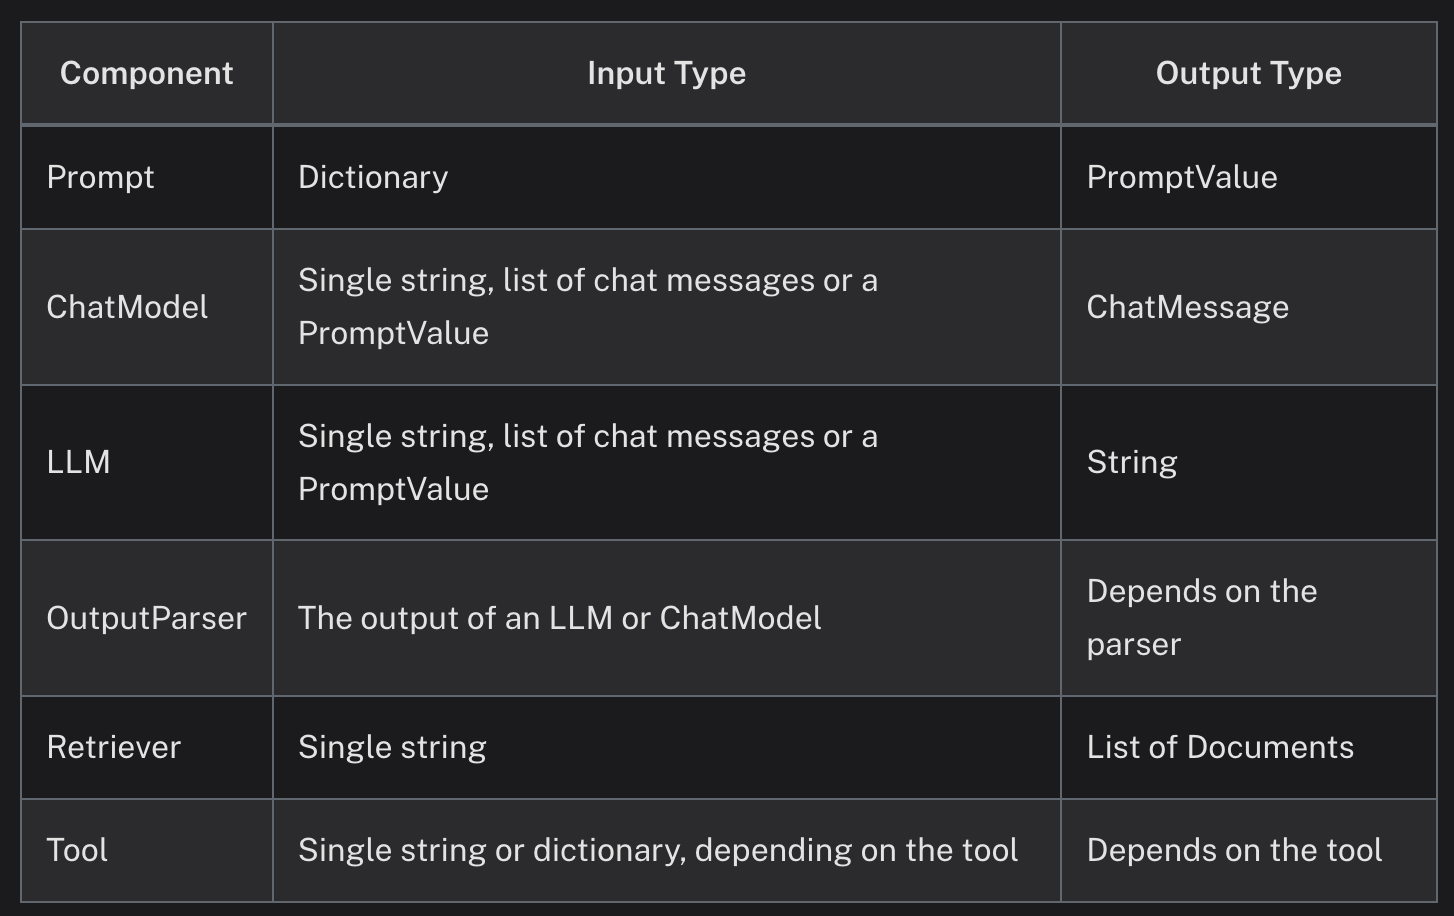

## [Runnable interface](https://python.langchain.com/v0.1/docs/expression_language/interface/)

이것은 표준 인터페이스로, 사용자 정의 체인을 정의하고 표준 방식으로 호출하는 것을 쉽게 해줍니다. 표준 인터페이스에는 다음이 포함됩니다.
- `stream`: 응답의 청크를 다시 스트리밍합니다.
- `invoke`: 입력에 대한 체인을 호출합니다.
- `batch`: 입력 목록에서 체인을 호출합니다.


동시성을 위해 asyncio 구문 과 함께 사용해야 하는 해당 비동기 메서드도 있습니다 .await
- `astream`: 응답의 청크를 비동기로 다시 스트리밍합니다.
- `ainvoke`: 비동기적으로 입력에 대한 체인을 호출합니다.
- `abatch`: 입력 목록에서 체인을 비동기로 호출합니다.
- `astream_log`: 최종 응답 외에도 발생하는 중간 단계를 다시 스트리밍합니다.
- `astream_events`: 체인에서 발생하는 베타langchain-core 스트림 이벤트( 0.1.14에서 도입)

In [192]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

model = ChatOpenAI()
prompt = ChatPromptTemplate.from_template("tell me a joke about {topic}")
chain = prompt | model

### Input Schema
- A description of the inputs accepted by a Runnable.
- This is a Pydantic model dynamically generated from the structure of any Runnable.

You can call .schema() on it to obtain a JSONSchema representation.

In [193]:
# The input schema of the chain is the input schema of its first part, the prompt.
chain.input_schema.schema()

{'properties': {'topic': {'title': 'Topic', 'type': 'string'}},
 'required': ['topic'],
 'title': 'PromptInput',
 'type': 'object'}

In [194]:
model.input_schema.schema()

{'$defs': {'AIMessage': {'additionalProperties': True,
   'description': 'Message from an AI.\n\nAIMessage is returned from a chat model as a response to a prompt.\n\nThis message represents the output of the model and consists of both\nthe raw output as returned by the model together standardized fields\n(e.g., tool calls, usage metadata) added by the LangChain framework.',
   'properties': {'content': {'anyOf': [{'type': 'string'},
      {'items': {'anyOf': [{'type': 'string'}, {'type': 'object'}]},
       'type': 'array'}],
     'title': 'Content'},
    'additional_kwargs': {'title': 'Additional Kwargs', 'type': 'object'},
    'response_metadata': {'title': 'Response Metadata', 'type': 'object'},
    'type': {'const': 'ai',
     'default': 'ai',
     'enum': ['ai'],
     'title': 'Type',
     'type': 'string'},
    'name': {'anyOf': [{'type': 'string'}, {'type': 'null'}],
     'default': None,
     'title': 'Name'},
    'id': {'anyOf': [{'type': 'string'}, {'type': 'null'}],
     'd

### Output Schema
- A description of the outputs produced by a Runnable.
- This is a Pydantic model dynamically generated from the structure of any Runnable.

You can call .schema() on it to obtain a JSONSchema representation.

In [195]:
# The output schema of the chain is the output schema of its last part, in this case a ChatModel, which outputs a ChatMessage
chain.output_schema.schema()

{'$defs': {'AIMessage': {'additionalProperties': True,
   'description': 'Message from an AI.\n\nAIMessage is returned from a chat model as a response to a prompt.\n\nThis message represents the output of the model and consists of both\nthe raw output as returned by the model together standardized fields\n(e.g., tool calls, usage metadata) added by the LangChain framework.',
   'properties': {'content': {'anyOf': [{'type': 'string'},
      {'items': {'anyOf': [{'type': 'string'}, {'type': 'object'}]},
       'type': 'array'}],
     'title': 'Content'},
    'additional_kwargs': {'title': 'Additional Kwargs', 'type': 'object'},
    'response_metadata': {'title': 'Response Metadata', 'type': 'object'},
    'type': {'const': 'ai',
     'default': 'ai',
     'enum': ['ai'],
     'title': 'Type',
     'type': 'string'},
    'name': {'anyOf': [{'type': 'string'}, {'type': 'null'}],
     'default': None,
     'title': 'Name'},
    'id': {'anyOf': [{'type': 'string'}, {'type': 'null'}],
     'd

### Stream
- stream back chunks of the response

In [196]:
for s in chain.stream({"topic": "bears"}):
    print(s.content, end="", flush=True)

Why did the bear break up with his girlfriend? 

Because he couldn't bear the relationship any longer!

### Invoke
- call the chain on an input

In [197]:
chain.invoke({"topic": "bears"})

AIMessage(content="Why did the bear break up with his girlfriend? \n\nBecause he couldn't bear the relationship any longer!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 13, 'total_tokens': 34, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-ac017f4d-8600-4175-901c-0448c86c8508-0', usage_metadata={'input_tokens': 13, 'output_tokens': 21, 'total_tokens': 34})

### Batch
- call the chain on a list of inputs

In [198]:
chain.batch([{"topic": "bears"}, {"topic": "cats"}])

[AIMessage(content="Why did the bear break up with his girlfriend? \n\nBecause he couldn't bear the relationship any longer!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 13, 'total_tokens': 34, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-08c4b6c4-b8ad-428c-9297-c84b056cf33e-0', usage_metadata={'input_tokens': 13, 'output_tokens': 21, 'total_tokens': 34}),
 AIMessage(content='Why was the cat sitting on the computer?\n\nBecause it wanted to keep an eye on the mouse!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 13, 'total_tokens': 33, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-d3bc0f6d-6a55-4624-8ec

- You can set the number of concurrent requests by using the `max_concurrency` parameter

In [199]:
chain.batch([{"topic": "bears"}, {"topic": "cats"}], config={"max_concurrency": 5})

[AIMessage(content='Why do bears have hairy coats?\n\nFur protection!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 13, 'total_tokens': 24, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-7423dd68-6296-4400-ba36-735a3ba526d4-0', usage_metadata={'input_tokens': 13, 'output_tokens': 11, 'total_tokens': 24}),
 AIMessage(content='Why was the cat sitting on the computer?\nBecause it wanted to keep an eye on the mouse!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 13, 'total_tokens': 33, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-dd861a52-a123-4ac4-880c-fd1fc39bcf7a-0', usage_metadata={'input_tokens': 13, 'o

### Async Stream
- stream back chunks of the response async

In [200]:
async for s in chain.astream({"topic": "bears"}):
    print(s.content, end="", flush=True)

Why did the bear break up with his girlfriend?

Because he couldn't bear the drama!

### Async Invoke
- call the chain on an input async

In [201]:
await chain.ainvoke({"topic": "bears"})

AIMessage(content="Why did the bear break up with his girlfriend? \n\nBecause he couldn't bear the relationship any longer!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 13, 'total_tokens': 34, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-1bafa938-a7b6-4997-8540-b5902b74dc26-0', usage_metadata={'input_tokens': 13, 'output_tokens': 21, 'total_tokens': 34})

### Async Batch
- call the chain on a list of inputs async

In [202]:
await chain.abatch([{"topic": "bears"}])

[AIMessage(content="Why don't bears wear shoes?\n\nBecause they prefer bear feet!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 13, 'total_tokens': 26, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-447e51f7-88e8-4332-87d4-1c4a13653c9f-0', usage_metadata={'input_tokens': 13, 'output_tokens': 13, 'total_tokens': 26})]

## RunnablePassthrough
- RunnablePassthrough 는 입력을 변경하지 않거나 추가 키를 더하여 전달할 수 있습니다.

In [203]:
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI


# prompt 와 llm 을 생성합니다.
prompt = PromptTemplate.from_template("{num} 의 10배는?")
llm = ChatOpenAI(temperature=0)

# chain 을 생성합니다.
chain = prompt | llm

- chain 을 invoke() 하여 실행할 때는 입력 데이터의 타입이 딕셔너리여야 합니다.

In [204]:
# chain 을 실행합니다.
chain.invoke({"num": 5})

AIMessage(content='50입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 3, 'prompt_tokens': 16, 'total_tokens': 19, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-c0af3d08-33b7-4a48-ace0-8aeb80e82af9-0', usage_metadata={'input_tokens': 16, 'output_tokens': 3, 'total_tokens': 19})

- 하지만, langchain 라이브러리가 업데이트 되면서 1개의 변수만 템플릿에 포함하고 있다면, 값만 전달하는 것도 가능합니다.

In [205]:
# chain 을 실행합니다.
chain.invoke(5)

AIMessage(content='50입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 3, 'prompt_tokens': 16, 'total_tokens': 19, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-ec7d721c-5e9b-45b5-9903-168d8c8119da-0', usage_metadata={'input_tokens': 16, 'output_tokens': 3, 'total_tokens': 19})

아래는 RunnablePassthrough 를 사용한 예제입니다.
- RunnablePassthrough 는 runnable 객체이며, runnable 객체는 invoke() 메소드를 사용하여 별도 실행이 가능합니다.

In [206]:
from langchain_core.runnables import RunnablePassthrough

# runnable
RunnablePassthrough().invoke({"num": 10})

{'num': 10}

- 아래는 RunnablePassthrough 로 체인을 구성하는 예제입니다.

In [207]:
runnable_chain = {"num": RunnablePassthrough()} | prompt | ChatOpenAI()

# dict 값이 RunnablePassthrough() 로 변경되었습니다.
runnable_chain.invoke(10)

AIMessage(content='10의 10배는 100입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 16, 'total_tokens': 27, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-718b827f-87b4-4e09-b3ae-10d939565197-0', usage_metadata={'input_tokens': 16, 'output_tokens': 11, 'total_tokens': 27})

- 다음은 RunnablePassthrough.assign() 을 사용하는 경우와 비교한 결과입니다.

In [208]:
RunnablePassthrough().invoke({"num": 1})

{'num': 1}

- RunnablePassthrough.assign()
  - 입력 값으로 들어온 값의 key/value 쌍과 새롭게 할당된 key/value 쌍을 합칩니다.

In [209]:
# 입력 키: num, 할당(assign) 키: new_num
(RunnablePassthrough.assign(new_num=lambda x: x["num"] * 3)).invoke({"num": 1})

{'num': 1, 'new_num': 3}

## RunnableParallel

In [210]:
from langchain_core.runnables import RunnableParallel

# RunnableParallel 인스턴스를 생성합니다. 이 인스턴스는 여러 Runnable 인스턴스를 병렬로 실행할 수 있습니다.
runnable = RunnableParallel(
    # RunnablePassthrough 인스턴스를 'passed' 키워드 인자로 전달합니다. 이는 입력된 데이터를 그대로 통과시키는 역할을 합니다.
    passed=RunnablePassthrough(),
    # 'extra' 키워드 인자로 RunnablePassthrough.assign을 사용하여, 'mult' 람다 함수를 할당합니다. 이 함수는 입력된 딕셔너리의 'num' 키에 해당하는 값을 3배로 증가시킵니다.
    extra=RunnablePassthrough.assign(mult=lambda x: x["num"] * 3),
    # 'modified' 키워드 인자로 람다 함수를 전달합니다. 이 함수는 입력된 딕셔너리의 'num' 키에 해당하는 값에 1을 더합니다.
    modified=lambda x: x["num"] + 1,
)

# runnable 인스턴스에 {'num': 1} 딕셔너리를 입력으로 전달하여 invoke 메소드를 호출합니다.
runnable.invoke({"num": 1})

{'passed': {'num': 1}, 'extra': {'num': 1, 'mult': 3}, 'modified': 2}

- Chain 도 RunnableParallel 적용할 수 있습니다.

In [211]:
chain1 = (
    {"country": RunnablePassthrough()}
    | PromptTemplate.from_template("{country} 의 수도는?")
    | ChatOpenAI()
)
chain2 = (
    {"country": RunnablePassthrough()}
    | PromptTemplate.from_template("{country} 의 면적은?")
    | ChatOpenAI()
)

In [212]:
combined_chain = RunnableParallel(capital=chain1, area=chain2)
combined_chain.invoke("대한민국")

{'capital': AIMessage(content='서울특별시입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 19, 'total_tokens': 29, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-ca327ad1-44ba-4c9a-84cf-2ae4fbb2392b-0', usage_metadata={'input_tokens': 19, 'output_tokens': 10, 'total_tokens': 29}),
 'area': AIMessage(content='대한민국의 면적은 약 100,363km² 입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 20, 'total_tokens': 42, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-07127fce-bf19-460f-915e-f31fc47b51b8-0', usage_metadata={'input_tokens': 20, 'output_tokens': 22, 'total_tokens': 42})}

## RunnableLambda
- RunnableLambda 를 사용하여 사용자 정의 함수를 맵핑할 수 있습니다.

In [213]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from datetime import datetime


def get_today(a):
    # 오늘 날짜를 가져오기
    return datetime.today().strftime("%b-%d")


# 오늘 날짜를 출력
get_today(None)

'Sep-15'

In [214]:
from langchain_core.runnables import RunnableLambda, RunnablePassthrough

# prompt 와 llm 을 생성합니다.
prompt = PromptTemplate.from_template(
    "{today} 가 생일인 유명인 {n} 명을 나열하세요. 생년월일을 표기해 주세요."
)
llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

# chain 을 생성합니다.
chain = (
    {"today": RunnableLambda(get_today), "n": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [215]:
# 출력
print(chain.invoke(3))

물론입니다. 9월 15일이 생일인 몇몇 유명인들을 아래에 나열해 보겠습니다:

1. 톰 하디 (Tom Hardy) - 1977년 9월 15일
2. 프린스 해리 (Prince Harry) - 1984년 9월 15일
3. 올리버 스톤 (Oliver Stone) - 1946년 9월 15일

이 외에도 많은 유명인들이 있지만, 이 세 명이 대표적입니다.


- itemgetter 를 사용하여 특정 키를 추출합니다.

In [216]:
from operator import itemgetter

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableLambda
from langchain_openai import ChatOpenAI


# 문장의 길이를 반환하는 함수입니다.
def length_function(text):
    return len(text)


# 두 문장의 길이를 곱한 값을 반환하는 함수입니다.
def _multiple_length_function(text1, text2):
    return len(text1) * len(text2)


# _multiple_length_function 함수를 사용하여 두 문장의 길이를 곱한 값을 반환하는 함수입니다.
def multiple_length_function(_dict):
    return _multiple_length_function(_dict["text1"], _dict["text2"])


prompt = ChatPromptTemplate.from_template("{a} + {b} 는 무엇인가요?")
model = ChatOpenAI()

chain1 = prompt | model

chain = (
    {
        "a": itemgetter("word1") | RunnableLambda(length_function),
        "b": {"text1": itemgetter("word1"), "text2": itemgetter("word2")}
        | RunnableLambda(multiple_length_function),
    }
    | prompt
    | model
)

In [217]:
chain.invoke({"word1": "hello", "word2": "world"})

AIMessage(content='5 + 25는 30입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 22, 'total_tokens': 31, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-b78569fa-1d12-4151-8947-a7ad96370c18-0', usage_metadata={'input_tokens': 22, 'output_tokens': 9, 'total_tokens': 31})